#### XTEJ118+480.ipynb

In this notebook, we set up a binary system BH+star modelled on the XTEJ118+480 system.

Observations:

https://iopscience.iop.org/article/10.1088/2041-8205/744/2/L25 

https://arxiv.org/abs/1211.2786

Inference of a DM spike:

GS spike:
https://arxiv.org/pdf/2212.05664

PBH spike
https://arxiv.org/abs/2406.07624



We set up the system following the references above. The DM profile is modelled as a PBH spike ($\gamma=9/4$). 
We then evolve for a number of orbits and plot the orbital properties and the spike profile over time.

In [5]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

from NbodyIMRI import tools, particles, simulator, reader
from NbodyIMRI import units as u
from NbodyIMRI import distributionfunctions as DF
import NbodyIMRI

In [7]:
#Specify the directory where snapshots are stored
NbodyIMRI.snapshot_dir = "../test_snapshots/"

In [8]:
import copy

In [9]:
#some constants
 
G_N = 6.674e-11  #SI: N*m^2/kg^2
rho_eq = 1512.0*u.Msun/u.pc**3 

In [10]:
u.yr/60/60/24


365.25

#### Setting up the system parameters


We use the following values for the orbital parameters:

$M_1=7.5 \, M_\odot$ 

$M_2=0.2 \,  M_\odot$

$r_\mathrm{orb}=0.01\, \mathrm{au} =  5.87 \times 10^{-8} \, \mathrm{pc}$  

$e=0$

$r_2= 7.6 \times 10^{-9} \, \mathrm{pc}$

The last value, $r_2$, is the radius of the star, which is a bit more than one part in ten of the orbital radius.


In [11]:
M_1 = 7.5*u.Msun
M_2 = 0.2*u.Msun

r_isco = tools.calc_risco(M_1)

r_orb= 5.87e-8*u.pc

a_i = r_orb

e_i = 0.0

r_2= 7.6e-9*u.pc


In [12]:
r_isco/u.pc

2.1504549999999996e-12

The DM spike is initialized with density profile:

$$ \rho(r) = \rho_6 (r/r_6)^{-\gamma_\mathrm{sp}}$$

with $r_6 = 10^{-6}\,\mathrm{pc}$. 


Assuming the variation of the orbital period is due to dynamical friction from DM, the references find

$$\rho(r_\mathrm{orb})= 1.59 \times 10^{-11} \, \mathrm{g} \,
\mathrm{cm}^{-3} $$

Assuming a spike index $\gamma=9/4$ we would get:

$$\rho_6= 2.7 \times 10^{-14} \, \mathrm{g} \,
\mathrm{cm}^{-3} = 3.9 \times 10^{8} \,  M_\odot \, \mathrm{pc} ^{-3}$$


However, for the PBH sike case, we are not free to set the normalization to agree with obrservations: is fixed by the mass of the PBH. One can only vary the size of the central plateau, which dpends on the time of kinetic decoupling of DM from radiation.

To start with, we assume that kd occurs before PBH formation, so we don't have a plateau. We expect this to result in a higher initial DM density at the orbital radius. 
However, this initial density is affected by the presence of the second body. 

The first goal is to quantify this variation for a no-plateau spike.


The normalization is obtained as follows: the density of the spike at a given radius is equal to the background DM density at the time of turnarond associated to that radius. 
Time and radius of turnaround are related by:

$$ r_\mathrm{t.a.}^3= 2GMt_\mathrm{t.a.}^2$$

This equation is valid up to equality, when a shell decouples at radius 

$$r_\mathrm{t.a.}(t_\mathrm{eq}) =  0.32 \, \mathrm{pc}\left( \dfrac{M}{M_\odot} \right)^{1/3} $$

Then I can write the spike profile as

$$ \rho(r) = \rho_\mathrm{eq} \left( \dfrac{r}{r_\mathrm{t.a.}(t_\mathrm{eq})} \right)^{-9/4} $$


For a mass of $7.5 M_\odot$, that gives

$$ \rho(r) = 1512 \, M_\odot \mathrm{pc}^{-3}  \left( \dfrac{r}{0.062 \mathrm{pc}} \right)^{-9/4} $$

Translating this into the $\rho_6$ parametrization we get

$$\rho_6= 9.3 \times 10^{13} \,  M_\odot \, \mathrm{pc} ^{-3} $$
 
And the density at the orbital radius is

$$\rho_\mathrm{orb}= 5.5 \times 10^{16} \,  M_\odot \, \mathrm{pc} ^{-3} = 3.7   \times 10^{-6} \,  \mathrm{g} \, \mathrm{cm} ^{-3}$$

To initialize the spike, I multiply the normalization constant $\rho_6$ by 1.5 to account for the orbital mtion of the DM paricles in the CDM limit (2406.07624).

Notice that the inferred DM density is about five orders of magnitude larger than the one predicted by the PBH spike model, with no plateau.

In [13]:
r_ta=(2*G_N*M_1*(60e3*u.yr)**2)**(1/3)
print("The turnaround radius for the shell decoupling at equality is: ", r_ta/u.pc, "pc")


rho_6=rho_eq*(1e-6*u.pc/r_ta)**(-9/4)
print(r"rho_6 is: ", "{:e}".format(rho_6/u.Msun*u.pc**3), "Msun pc^-3")

rho_orb_spike= rho_eq*(r_orb/r_ta)**(-9/4)
print(r"rho_orb is: ", rho_orb_spike/u.Msun*u.pc**3, "Msun pc^-3 or ",rho_orb_spike/u.g*u.cm**3, "g cm^-3")

The turnaround radius for the shell decoupling at equality is:  0.062396121057400875 pc
rho_6 is:  9.303714e+13 Msun pc^-3
rho_orb is:  5.4855559037331256e+16 Msun pc^-3 or  3.712833936466211e-06 g cm^-3


In [96]:
gamma_sp=9./4.

rho_6 = 1.5*9e13*u.Msun/u.pc**3 #Normalisation of the spike

r_t  = 20*a_i   #Artificial truncation radius of the spike

N_DM = 10000

#### Generating initial conditions


> Particle set:
>     M_1 [M_sun] = 7.5
>     M_2 [M_sun] = 0.2
>     (a [pc], e) = (5.869999999999998e-08, 0.0)
 
>     N_DM = 10000
>     M_DM [M_sun] = 2.125180206467746e-07


(<Figure size 1152x360 with 3 Axes>,
 array([<AxesSubplot:xlabel='$x$ [pc]', ylabel='$y$ [pc]'>,
        <AxesSubplot:xlabel='$x$ [pc]', ylabel='$z$ [pc]'>,
        <AxesSubplot:xlabel='$\\log_{10}(r/\\mathrm{pc})$', ylabel='$P(\\log_{10}(r/\\mathrm{pc}))$'>],
       dtype=object))

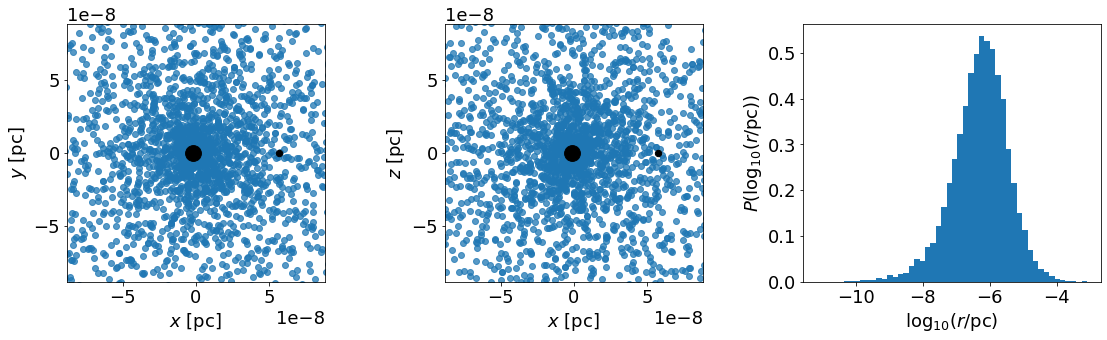

In [97]:
p_binary = particles.particles_in_binary(M_1, M_2, a_i, e_i, N_DM = N_DM, gamma_sp=gamma_sp, rho_6 = rho_6,  r_max = 1e-2*u.pc, r_t=r_t, alpha=2, r_soft=eps1)

p_binary.summary()
p_binary.plot()

#### Setting up the simulator and simulation parameters

In [100]:
eps1 = 10*r_isco 
eps2 = r_2

In [26]:

T_orb = p_binary.T_orb()
N_step_per_orb = 1000
N_orb = 10

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb


sim = simulator.simulator(p_binary, r_soft_sq1 = (eps1)**2, r_soft_sq2 = (eps2)**2)
sim.run_simulation(dt, t_end, show_progress=True, N_save = 1000, save_to_file=True)





> Simulating...
No old snapshot file found...
10000 10 1


100%|██████████| 10000/10000 [00:46<00:00, 215.40it/s]

> Simulation completed.


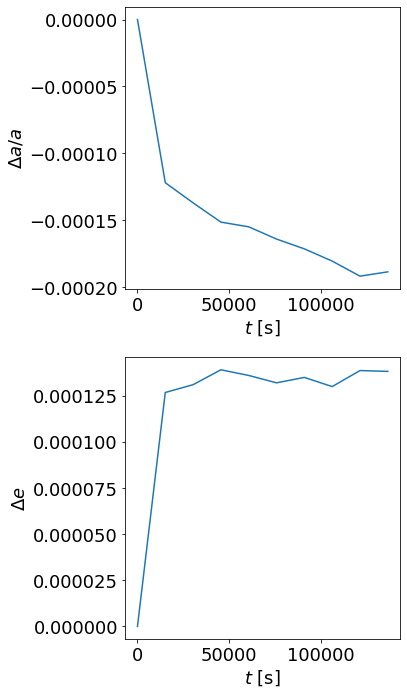

In [28]:
sim.plot_orbital_elements();

#the option N_save = 1000 means it doens't save nor plot all the steps

> Simulating...


100%|██████████| 10000/10000 [00:47<00:00, 210.32it/s]


> Simulation completed.


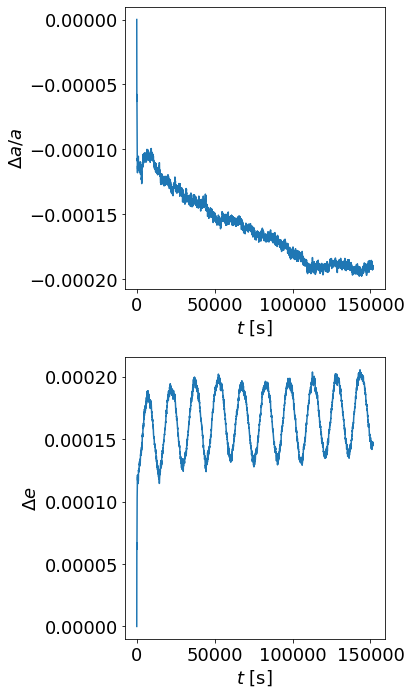

In [22]:
T_orb = p_binary.T_orb()
N_step_per_orb = 1000
N_orb = 10

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb

sim = simulator.simulator(p_binary, r_soft_sq1 = (eps1)**2, r_soft_sq2 = (eps2)**2)
sim.run_simulation(dt, t_end, show_progress=True)
sim.plot_orbital_elements();

> Simulating...


100%|██████████| 10000/10000 [00:51<00:00, 195.18it/s]


> Simulation completed.


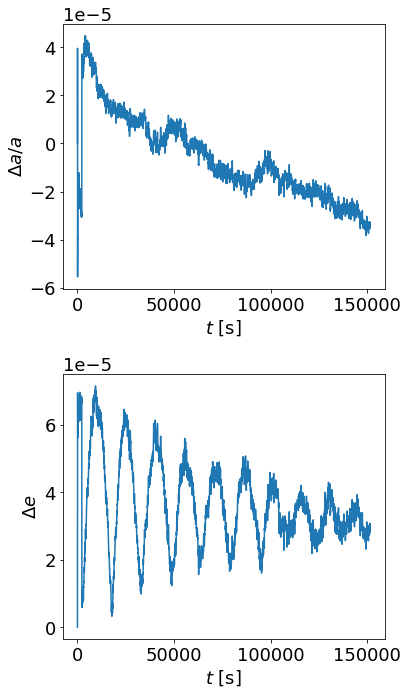

In [23]:
T_orb = p_binary.T_orb()
N_step_per_orb = 1000
N_orb = 10

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb

sim = simulator.simulator(p_binary, r_soft_sq1 = (eps1)**2, r_soft_sq2 = (eps2)**2)
sim.run_simulation(dt, t_end, show_progress=True)
sim.plot_orbital_elements();

Let's run 100 orbits!

> Simulating...


100%|██████████| 100000/100000 [07:49<00:00, 213.08it/s]


> Simulation completed.


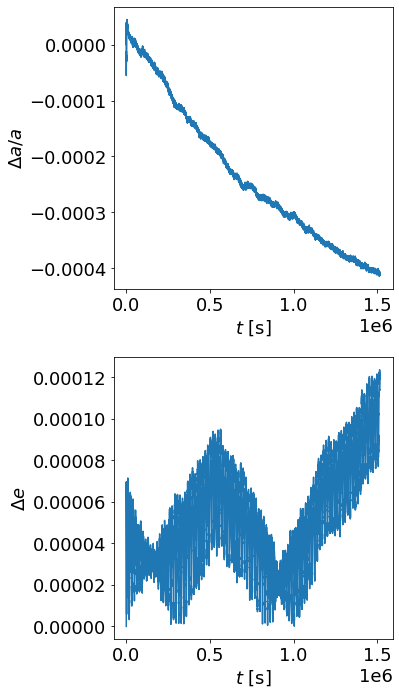

In [24]:
T_orb = p_binary.T_orb()
N_step_per_orb = 1000
N_orb = 100

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb

sim = simulator.simulator(p_binary, r_soft_sq1 = (eps1)**2, r_soft_sq2 = (eps2)**2)
sim.run_simulation(dt, t_end, show_progress=True)
sim.plot_orbital_elements();

> Simulating...
No old snapshot file found...
100000 100000 100000


100%|██████████| 100000/100000 [08:45<00:00, 190.14it/s]


> Simulation completed.


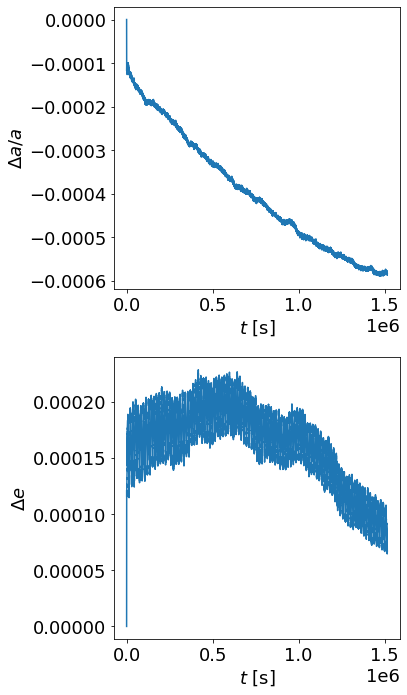

In [29]:
#same as above but reinitiated the DM spike

T_orb = p_binary.T_orb()
N_step_per_orb = 1000
N_orb = 100

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb
sim = simulator.simulator(p_binary, r_soft_sq1 = eps1**2, r_soft_sq2 = eps2**2)
sim.run_simulation(dt, t_end, show_progress=True, save_to_file = True, save_DM_states = True)
sim.plot_orbital_elements();

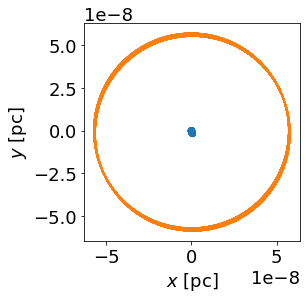

In [32]:
sim.plot_trajectory();

> Simulating...
No old snapshot file found...
100000 100000 100000


100%|██████████| 100000/100000 [08:38<00:00, 192.97it/s]


> Simulation completed.


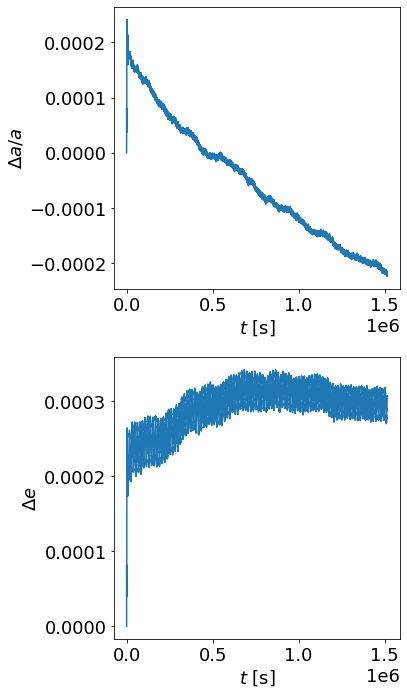

In [33]:
#same as above but reinitiated the DM spike

T_orb = p_binary.T_orb()
N_step_per_orb = 1000
N_orb = 100

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb
sim = simulator.simulator(p_binary, r_soft_sq1 = eps1**2, r_soft_sq2 = eps2**2)
sim.run_simulation(dt, t_end, show_progress=True, save_to_file = True, save_DM_states = True)
sim.plot_orbital_elements();

> Simulating...


100%|██████████| 500000/500000 [37:16<00:00, 223.54it/s] 


> Simulation completed.


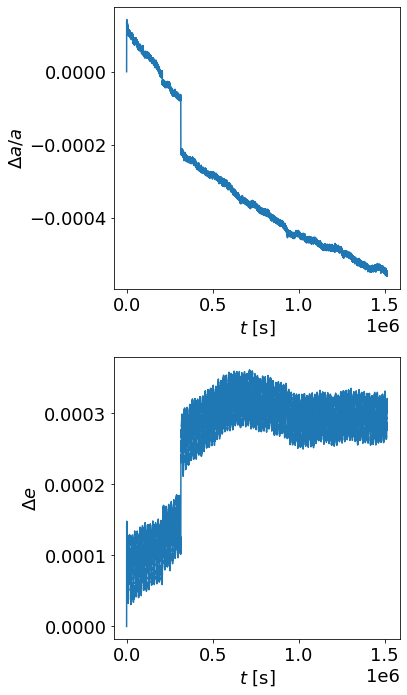

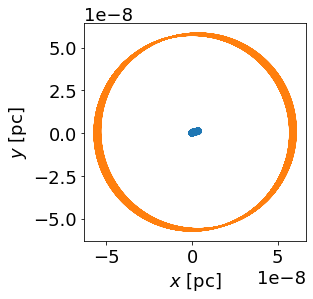

In [27]:
T_orb = p_binary.T_orb()
N_step_per_orb = 5000
N_orb = 100

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb

sim = simulator.simulator(p_binary, r_soft_sq1 = (eps1)**2, r_soft_sq2 = (eps2)**2)
sim.run_simulation(dt, t_end, show_progress=True)
sim.plot_orbital_elements();
sim.plot_trajectory();

#### Internal events

You can also pass the `check_state` parameter to the `simulator` object. `check_state` will be a function which the simulator calls after every timestep, to perform some check or operation.

Let's add in a function which checks whether any DM particles are within a certain distance of the small BH:

In [41]:
#The check_state function should take a `simulator` object as input
def check_state(simulator):
    #The particle set is stored in an object labelled `p` in the simulator. 
    #Let's check the minimum separation between the DM and the small BH
    r_DM = tools.norm(simulator.p.xDM - simulator.p.xBH2)
    if np.any(r_DM < r_2):
        print("Star crossing! r_min = ", np.min(r_DM/u.pc), "pc")
    if np.any(r_DM < 10**-9 *u.pc):
        print("Close encounter! r_min = ", np.min(r_DM/u.pc), "pc")    
#In here, it can also be useful to use simulator.current_step, which returns the current step (i.e. 10 is the tenth step in the simulation)
#This can be useful if you only want to do something every 10 or 100 steps (or whatever).

> Simulating...


  0%|          | 17/5000 [00:00<00:30, 163.15it/s]

Star crossing! r_min =  5.867605223863488e-09 pc
Star crossing! r_min =  6.108777108478353e-09 pc
Star crossing! r_min =  6.3548843971972325e-09 pc
Star crossing! r_min =  6.605338806262154e-09 pc
Star crossing! r_min =  6.8596270859858375e-09 pc
Star crossing! r_min =  7.1173007981555685e-09 pc
Star crossing! r_min =  7.377967363691237e-09 pc
Star crossing! r_min =  6.11394805082286e-09 pc
Star crossing! r_min =  6.699170039739848e-09 pc


  1%|▏         | 74/5000 [00:00<00:26, 189.16it/s]

Star crossing! r_min =  7.552570538681346e-09 pc
Star crossing! r_min =  7.210991603947227e-09 pc
Star crossing! r_min =  6.938834089659864e-09 pc
Star crossing! r_min =  6.744446115800263e-09 pc
Star crossing! r_min =  6.634591580266673e-09 pc
Star crossing! r_min =  6.6133957700857765e-09 pc
Star crossing! r_min =  6.681602211646017e-09 pc
Star crossing! r_min =  6.836425476365983e-09 pc
Star crossing! r_min =  7.072061270066681e-09 pc
Star crossing! r_min =  7.380649803224567e-09 pc


  2%|▏         | 115/5000 [00:00<00:26, 181.70it/s]

Star crossing! r_min =  7.59158994937883e-09 pc
Star crossing! r_min =  7.073612952724866e-09 pc
Star crossing! r_min =  6.581780269916653e-09 pc
Star crossing! r_min =  6.122501403954107e-09 pc
Star crossing! r_min =  5.703746440575455e-09 pc
Star crossing! r_min =  5.335160223497805e-09 pc
Star crossing! r_min =  5.027873812042456e-09 pc
Star crossing! r_min =  4.79376446433192e-09 pc
Star crossing! r_min =  4.643973498556828e-09 pc
Star crossing! r_min =  4.586815081848567e-09 pc
Star crossing! r_min =  4.625754067558932e-09 pc
Star crossing! r_min =  4.758445341036741e-09 pc
Star crossing! r_min =  4.9773946421862755e-09 pc
Star crossing! r_min =  5.271849763868032e-09 pc
Star crossing! r_min =  5.629948030537867e-09 pc
Star crossing! r_min =  6.0403426282297625e-09 pc
Star crossing! r_min =  6.493077928783716e-09 pc
Star crossing! r_min =  6.979865325717755e-09 pc
Star crossing! r_min =  7.49401134644807e-09 pc
Star crossing! r_min =  7.405482664147946e-09 pc
Star crossing! r_min 

  3%|▎         | 154/5000 [00:00<00:26, 180.72it/s]

Star crossing! r_min =  1.528174744221254e-09 pc
Star crossing! r_min =  1.5173040363322585e-09 pc
Star crossing! r_min =  1.6850890849866398e-09 pc
Star crossing! r_min =  1.9867940361805578e-09 pc
Star crossing! r_min =  2.3719007610028458e-09 pc
Star crossing! r_min =  2.8063463693461705e-09 pc
Star crossing! r_min =  3.27060627300694e-09 pc
Star crossing! r_min =  3.753723438208608e-09 pc
Star crossing! r_min =  4.249368899790004e-09 pc
Star crossing! r_min =  4.753731106587013e-09 pc
Star crossing! r_min =  5.2644178164823e-09 pc
Star crossing! r_min =  5.779871734770229e-09 pc
Star crossing! r_min =  6.299047583794291e-09 pc
Star crossing! r_min =  6.821226309533658e-09 pc
Star crossing! r_min =  7.345904005314412e-09 pc
Star crossing! r_min =  7.5949434484455e-09 pc
Star crossing! r_min =  7.374066238878516e-09 pc
Star crossing! r_min =  7.188656731494801e-09 pc
Star crossing! r_min =  7.041615112555655e-09 pc
Star crossing! r_min =  6.935480817204366e-09 pc
Star crossing! r_min

  4%|▍         | 191/5000 [00:01<00:27, 172.69it/s]

Star crossing! r_min =  7.215575313420877e-09 pc
Star crossing! r_min =  7.408213964957071e-09 pc
Star crossing! r_min =  7.511202613198554e-09 pc
Star crossing! r_min =  7.415259611535736e-09 pc
Star crossing! r_min =  7.296704604455737e-09 pc
Star crossing! r_min =  7.202149268111039e-09 pc
Star crossing! r_min =  7.132556825437404e-09 pc
Star crossing! r_min =  7.088667428970228e-09 pc
Star crossing! r_min =  7.070960782336793e-09 pc
Star crossing! r_min =  7.0796305752397216e-09 pc
Star crossing! r_min =  7.114573807097275e-09 pc
Star crossing! r_min =  7.1753963355444906e-09 pc
Star crossing! r_min =  7.26143395530683e-09 pc
Star crossing! r_min =  7.371786435017576e-09 pc
Star crossing! r_min =  7.50536060788448e-09 pc
Star crossing! r_min =  7.231791494534963e-09 pc
Star crossing! r_min =  6.714467775779191e-09 pc
Star crossing! r_min =  6.22502035503236e-09 pc
Star crossing! r_min =  5.770641008404948e-09 pc
Star crossing! r_min =  5.360343815266833e-09 pc
Star crossing! r_min 

  5%|▍         | 226/5000 [00:01<00:29, 163.62it/s]

Star crossing! r_min =  4.7173179067276086e-09 pc
Star crossing! r_min =  4.51011297768147e-09 pc
Star crossing! r_min =  4.394900579743146e-09 pc
Star crossing! r_min =  4.378977909410422e-09 pc
Star crossing! r_min =  4.4634216363244955e-09 pc
Star crossing! r_min =  4.6427569083190316e-09 pc
Star crossing! r_min =  4.906574155443034e-09 pc
Star crossing! r_min =  5.242105749462112e-09 pc
Star crossing! r_min =  5.636520621641241e-09 pc
Star crossing! r_min =  6.0783196601341686e-09 pc
Star crossing! r_min =  6.557878526073787e-09 pc
Star crossing! r_min =  7.067454152948746e-09 pc
Star crossing! r_min =  6.867095163208129e-09 pc
Star crossing! r_min =  6.446708181651756e-09 pc
Star crossing! r_min =  6.096967962013842e-09 pc
Star crossing! r_min =  5.830713668903512e-09 pc
Star crossing! r_min =  5.659837997845689e-09 pc
Star crossing! r_min =  5.593170609575535e-09 pc
Star crossing! r_min =  5.634474021543194e-09 pc
Star crossing! r_min =  5.78147745557277e-09 pc
Star crossing! r_m

  5%|▌         | 260/5000 [00:01<00:29, 161.79it/s]

Star crossing! r_min =  7.129068718425009e-09 pc
Star crossing! r_min =  7.346819466022147e-09 pc
Star crossing! r_min =  7.366220992385687e-09 pc
Star crossing! r_min =  7.05335715351049e-09 pc
Star crossing! r_min =  6.751114652943269e-09 pc
Star crossing! r_min =  6.460926668695398e-09 pc
Star crossing! r_min =  6.184432157915042e-09 pc
Star crossing! r_min =  5.923490303517457e-09 pc
Star crossing! r_min =  5.68018583583213e-09 pc
Star crossing! r_min =  5.4568190729686325e-09 pc
Star crossing! r_min =  5.2558730638471616e-09 pc
Star crossing! r_min =  5.079949732913848e-09 pc
Star crossing! r_min =  4.9316685703328705e-09 pc
Star crossing! r_min =  4.813526434726302e-09 pc
Star crossing! r_min =  4.727726006151741e-09 pc
Star crossing! r_min =  4.675992095527265e-09 pc
Star crossing! r_min =  4.659405557048594e-09 pc
Star crossing! r_min =  4.6782884124654165e-09 pc
Star crossing! r_min =  4.732166723768411e-09 pc
Star crossing! r_min =  4.819820380566881e-09 pc
Star crossing! r_m

  6%|▌         | 294/5000 [00:01<00:29, 160.36it/s]

Star crossing! r_min =  7.154215519571713e-09 pc
Star crossing! r_min =  7.0430449744914085e-09 pc
Star crossing! r_min =  6.936315604909399e-09 pc
Star crossing! r_min =  6.834268433442432e-09 pc
Star crossing! r_min =  6.737150381483243e-09 pc
Star crossing! r_min =  6.645212941206858e-09 pc
Star crossing! r_min =  6.558710580599994e-09 pc
Star crossing! r_min =  6.477898874682137e-09 pc
Star crossing! r_min =  6.4030323652573976e-09 pc
Star crossing! r_min =  6.334362162821971e-09 pc
Star crossing! r_min =  6.272133317340571e-09 pc
Star crossing! r_min =  6.2165819990845256e-09 pc
Star crossing! r_min =  6.167932545792198e-09 pc
Star crossing! r_min =  6.126394446946618e-09 pc
Star crossing! r_min =  6.092159348763777e-09 pc
Star crossing! r_min =  6.065398173214189e-09 pc
Star crossing! r_min =  6.046258449731999e-09 pc
Star crossing! r_min =  6.0348619581538094e-09 pc
Star crossing! r_min =  6.031302775157021e-09 pc
Star crossing! r_min =  6.0356458039039325e-09 pc
Star crossing! 

  6%|▌         | 311/5000 [00:01<00:29, 160.08it/s]

Star crossing! r_min =  6.788777773386598e-09 pc
Star crossing! r_min =  6.895333724130249e-09 pc
Star crossing! r_min =  7.007827799590976e-09 pc
Star crossing! r_min =  7.126034212801933e-09 pc
Star crossing! r_min =  7.008195877134286e-09 pc
Star crossing! r_min =  6.7826996418051536e-09 pc
Star crossing! r_min =  6.571563277939935e-09 pc
Star crossing! r_min =  6.37625079306411e-09 pc
Star crossing! r_min =  6.198293966741442e-09 pc
Star crossing! r_min =  6.039261173537187e-09 pc
Star crossing! r_min =  5.900714664636094e-09 pc
Star crossing! r_min =  5.7841565415085255e-09 pc
Star crossing! r_min =  5.690965488979208e-09 pc
Star crossing! r_min =  5.622328558535307e-09 pc
Star crossing! r_min =  5.579174421997142e-09 pc
Star crossing! r_min =  5.5621159090637755e-09 pc
Star crossing! r_min =  5.571409619095564e-09 pc
Star crossing! r_min =  5.606938620507183e-09 pc
Star crossing! r_min =  5.534552575200192e-09 pc
Star crossing! r_min =  5.350815553906767e-09 pc
Star crossing! r_m

  7%|▋         | 345/5000 [00:02<00:29, 159.24it/s]

Star crossing! r_min =  3.840269879810948e-09 pc
Star crossing! r_min =  3.858154907947802e-09 pc
Star crossing! r_min =  3.9649955167347725e-09 pc
Star crossing! r_min =  4.153816314456653e-09 pc
Star crossing! r_min =  4.413996119577909e-09 pc
Star crossing! r_min =  4.733674977446781e-09 pc
Star crossing! r_min =  5.101576951609183e-09 pc
Star crossing! r_min =  5.507949273563746e-09 pc
Star crossing! r_min =  5.944814583466619e-09 pc
Star crossing! r_min =  5.796999627625658e-09 pc
Star crossing! r_min =  5.432446016732263e-09 pc
Star crossing! r_min =  5.123841499616746e-09 pc
Star crossing! r_min =  4.8819060783321306e-09 pc
Star crossing! r_min =  4.717002470610854e-09 pc
Star crossing! r_min =  4.637441507077372e-09 pc
Star crossing! r_min =  4.647684899992236e-09 pc
Star crossing! r_min =  4.747217700009415e-09 pc
Star crossing! r_min =  4.930690764205596e-09 pc
Star crossing! r_min =  5.189252313724355e-09 pc
Star crossing! r_min =  5.5123797216381335e-09 pc
Star crossing! r_

  9%|▊         | 429/5000 [00:02<00:29, 155.05it/s]

Star crossing! r_min =  7.247408028685257e-09 pc
Star crossing! r_min =  6.565644193326647e-09 pc
Star crossing! r_min =  5.894966216112782e-09 pc
Star crossing! r_min =  5.2397085070229915e-09 pc
Star crossing! r_min =  4.606529315081492e-09 pc
Star crossing! r_min =  4.005980464225356e-09 pc
Star crossing! r_min =  3.455180928115865e-09 pc
Star crossing! r_min =  2.981879233654021e-09 pc
Star crossing! r_min =  2.6283156695352074e-09 pc
Star crossing! r_min =  2.446966397041316e-09 pc
Star crossing! r_min =  2.475950228918242e-09 pc
Star crossing! r_min =  2.708484759091613e-09 pc
Star crossing! r_min =  3.0990296079932837e-09 pc
Star crossing! r_min =  3.5964065382807587e-09 pc
Star crossing! r_min =  4.162420815641216e-09 pc
Star crossing! r_min =  4.7726365837141305e-09 pc
Star crossing! r_min =  5.412041646308065e-09 pc
Star crossing! r_min =  5.549872665461482e-09 pc
Star crossing! r_min =  4.8674191187456525e-09 pc
Star crossing! r_min =  4.197704575663304e-09 pc
Star crossing!

  9%|▉         | 465/5000 [00:02<00:27, 164.61it/s]

Star crossing! r_min =  6.477280526696231e-09 pc
Star crossing! r_min =  7.17644816374201e-09 pc
Star crossing! r_min =  6.653045361335192e-09 pc
Star crossing! r_min =  6.091365088832017e-09 pc
Star crossing! r_min =  5.588224156488952e-09 pc
Star crossing! r_min =  5.1608604779952e-09 pc
Star crossing! r_min =  4.829506208678785e-09 pc
Star crossing! r_min =  4.614943573969384e-09 pc
Star crossing! r_min =  4.533818513622697e-09 pc
Star crossing! r_min =  4.593218595018495e-09 pc
Star crossing! r_min =  4.787907083924698e-09 pc
Star crossing! r_min =  5.1023929153343514e-09 pc
Star crossing! r_min =  5.516180617225068e-09 pc
Star crossing! r_min =  6.008733342519772e-09 pc
Star crossing! r_min =  6.56227223989774e-09 pc
Star crossing! r_min =  7.162596912691603e-09 pc
Star crossing! r_min =  7.464089833617406e-09 pc
Star crossing! r_min =  7.325834207377278e-09 pc
Star crossing! r_min =  7.213607771329765e-09 pc
Star crossing! r_min =  7.12864461604871e-09 pc
Star crossing! r_min =  

 10%|█         | 501/5000 [00:03<00:26, 169.15it/s]

Star crossing! r_min =  5.107919298362087e-09 pc
Star crossing! r_min =  4.939255035323762e-09 pc
Star crossing! r_min =  4.799375602194317e-09 pc
Star crossing! r_min =  4.69080177054046e-09 pc
Star crossing! r_min =  4.615694289651795e-09 pc
Star crossing! r_min =  4.575659382763724e-09 pc
Star crossing! r_min =  4.5715840698042376e-09 pc
Star crossing! r_min =  4.603537468504484e-09 pc
Star crossing! r_min =  4.670762281729941e-09 pc
Star crossing! r_min =  4.771758717873865e-09 pc
Star crossing! r_min =  4.904440144341466e-09 pc
Star crossing! r_min =  5.0663255063251425e-09 pc
Star crossing! r_min =  5.254732276824898e-09 pc
Star crossing! r_min =  5.466942848882741e-09 pc
Star crossing! r_min =  5.700330549538291e-09 pc
Star crossing! r_min =  5.952443214712491e-09 pc
Star crossing! r_min =  6.221049778159365e-09 pc
Star crossing! r_min =  6.50415854133297e-09 pc
Star crossing! r_min =  6.80001597815456e-09 pc
Star crossing! r_min =  7.107093546580745e-09 pc
Star crossing! r_min 

 11%|█         | 541/5000 [00:03<00:24, 182.79it/s]

Star crossing! r_min =  7.495006648925606e-09 pc
Star crossing! r_min =  7.276264825908086e-09 pc
Star crossing! r_min =  7.104825905960146e-09 pc
Star crossing! r_min =  6.9842980476603e-09 pc
Star crossing! r_min =  6.917462979755968e-09 pc
Star crossing! r_min =  6.905994700433988e-09 pc
Star crossing! r_min =  6.950276030010921e-09 pc
Star crossing! r_min =  7.049358098949769e-09 pc
Star crossing! r_min =  7.201073061182949e-09 pc
Star crossing! r_min =  7.4022710220642846e-09 pc
Star crossing! r_min =  7.502692119003092e-09 pc
Star crossing! r_min =  7.26634957133108e-09 pc
Star crossing! r_min =  7.0337932838069e-09 pc
Star crossing! r_min =  6.8054248558520135e-09 pc


 12%|█▏        | 579/5000 [00:03<00:25, 176.20it/s]

Star crossing! r_min =  6.581693060743664e-09 pc
Star crossing! r_min =  6.3630991649386476e-09 pc
Star crossing! r_min =  6.150202453352735e-09 pc
Star crossing! r_min =  5.943625754668386e-09 pc
Star crossing! r_min =  5.744060648329801e-09 pc
Star crossing! r_min =  5.552271888068453e-09 pc
Star crossing! r_min =  5.369100399208256e-09 pc
Star crossing! r_min =  5.19546398699131e-09 pc
Star crossing! r_min =  5.032354683226352e-09 pc
Star crossing! r_min =  4.880831463650964e-09 pc
Star crossing! r_min =  4.742006972493564e-09 pc
Star crossing! r_min =  4.617026979729183e-09 pc
Star crossing! r_min =  4.507041678484184e-09 pc
Star crossing! r_min =  4.413168700580059e-09 pc
Star crossing! r_min =  4.336448919508444e-09 pc
Star crossing! r_min =  4.277797627214682e-09 pc
Star crossing! r_min =  4.237955243934745e-09 pc
Star crossing! r_min =  4.217442917224613e-09 pc
Star crossing! r_min =  4.2165287051185375e-09 pc
Star crossing! r_min =  4.235209184705908e-09 pc
Star crossing! r_mi

 12%|█▏        | 614/5000 [00:03<00:26, 164.14it/s]

Star crossing! r_min =  6.326647111256309e-09 pc
Star crossing! r_min =  6.5421635864643465e-09 pc
Star crossing! r_min =  6.762669211425081e-09 pc
Star crossing! r_min =  6.984531533080071e-09 pc
Star crossing! r_min =  7.203026683515267e-09 pc
Star crossing! r_min =  7.4411425591340205e-09 pc
Star crossing! r_min =  7.340539680261666e-09 pc
Star crossing! r_min =  7.077335263842218e-09 pc
Star crossing! r_min =  6.859236871559062e-09 pc
Star crossing! r_min =  6.690777169927297e-09 pc
Star crossing! r_min =  6.5758929140987396e-09 pc
Star crossing! r_min =  6.517538108004196e-09 pc
Star crossing! r_min =  6.517350181504706e-09 pc
Star crossing! r_min =  6.575450490350573e-09 pc
Star crossing! r_min =  6.6904337688319735e-09 pc
Star crossing! r_min =  6.859549283408178e-09 pc
Star crossing! r_min =  7.079023277816114e-09 pc
Star crossing! r_min =  7.344442679096543e-09 pc


 13%|█▎        | 651/5000 [00:03<00:25, 170.58it/s]

Star crossing! r_min =  7.546917412677745e-09 pc
Star crossing! r_min =  7.134832699908175e-09 pc
Star crossing! r_min =  6.778729934882939e-09 pc
Star crossing! r_min =  6.487892177245871e-09 pc
Star crossing! r_min =  6.271453016470638e-09 pc
Star crossing! r_min =  6.1373231752657515e-09 pc
Star crossing! r_min =  6.090963726746834e-09 pc
Star crossing! r_min =  6.1343722667001505e-09 pc
Star crossing! r_min =  6.265677363898442e-09 pc
Star crossing! r_min =  6.479519207734827e-09 pc
Star crossing! r_min =  6.768049165182825e-09 pc
Star crossing! r_min =  7.122156170738299e-09 pc
Star crossing! r_min =  7.53254930056822e-09 pc


 14%|█▍        | 712/5000 [00:04<00:23, 180.02it/s]

Star crossing! r_min =  7.526309591486788e-09 pc
Star crossing! r_min =  7.480098148940736e-09 pc
Star crossing! r_min =  7.479302137986897e-09 pc
Star crossing! r_min =  7.523855288671841e-09 pc
Star crossing! r_min =  7.56064401379147e-09 pc
Star crossing! r_min =  7.3070476500149935e-09 pc
Star crossing! r_min =  7.05541571508666e-09 pc
Star crossing! r_min =  6.806003315228589e-09 pc
Star crossing! r_min =  6.559101358889998e-09 pc
Star crossing! r_min =  6.315042544566603e-09 pc
Star crossing! r_min =  6.074208393199934e-09 pc
Star crossing! r_min =  5.8370374739889565e-09 pc
Star crossing! r_min =  5.604034964459463e-09 pc
Star crossing! r_min =  5.375783653449927e-09 pc
Star crossing! r_min =  5.152956422582901e-09 pc
Star crossing! r_min =  4.936330103045748e-09 pc
Star crossing! r_min =  4.726800365245119e-09 pc
Star crossing! r_min =  4.525396913831322e-09 pc
Star crossing! r_min =  4.333297676783976e-09 pc
Star crossing! r_min =  4.151839853817253e-09 pc
Star crossing! r_min

 15%|█▍        | 731/5000 [00:04<00:24, 174.66it/s]

Star crossing! r_min =  3.687093413907396e-09 pc
Star crossing! r_min =  3.564657074473359e-09 pc
Star crossing! r_min =  3.461605843529757e-09 pc
Star crossing! r_min =  3.379761903772076e-09 pc
Star crossing! r_min =  3.320741961668704e-09 pc
Star crossing! r_min =  3.2858238958000373e-09 pc
Star crossing! r_min =  3.275825424074066e-09 pc
Star crossing! r_min =  3.29101941893136e-09 pc
Star crossing! r_min =  3.3311054856143852e-09 pc
Star crossing! r_min =  3.3952447495239342e-09 pc
Star crossing! r_min =  3.4821492173969357e-09 pc
Star crossing! r_min =  3.5902051301808194e-09 pc
Star crossing! r_min =  3.7176057094844734e-09 pc
Star crossing! r_min =  3.8624724806026496e-09 pc
Star crossing! r_min =  4.022952457214003e-09 pc
Star crossing! r_min =  4.197286873294819e-09 pc
Star crossing! r_min =  4.383853292478638e-09 pc
Star crossing! r_min =  4.5811861565334e-09 pc
Star crossing! r_min =  4.7879817124598286e-09 pc
Star crossing! r_min =  5.0030927234102155e-09 pc
Star crossing!

 17%|█▋        | 834/5000 [00:04<00:21, 194.08it/s]

Star crossing! r_min =  7.297690029858323e-09 pc
Star crossing! r_min =  7.033331713405455e-09 pc
Star crossing! r_min =  6.825781895436428e-09 pc
Star crossing! r_min =  6.680389692094533e-09 pc
Star crossing! r_min =  6.601308310490127e-09 pc
Star crossing! r_min =  6.590962233835308e-09 pc
Star crossing! r_min =  6.649701460681217e-09 pc
Star crossing! r_min =  6.7757506674622274e-09 pc
Star crossing! r_min =  6.965469994116938e-09 pc
Star crossing! r_min =  7.213843748997807e-09 pc
Star crossing! r_min =  7.51505776552526e-09 pc
Star crossing! r_min =  7.419361157213468e-09 pc
Star crossing! r_min =  7.020555938404772e-09 pc
Star crossing! r_min =  6.659978224626232e-09 pc
Star crossing! r_min =  6.344216926216324e-09 pc
Star crossing! r_min =  6.080316870084549e-09 pc
Star crossing! r_min =  5.875318986376058e-09 pc
Star crossing! r_min =  5.7355796154713356e-09 pc
Star crossing! r_min =  5.665954114518086e-09 pc
Star crossing! r_min =  5.669038631791227e-09 pc
Star crossing! r_mi

 17%|█▋        | 873/5000 [00:05<00:23, 179.14it/s]

Star crossing! r_min =  6.100403439950987e-09 pc
Star crossing! r_min =  6.368956059120102e-09 pc
Star crossing! r_min =  6.688768283337091e-09 pc
Star crossing! r_min =  7.05281928156658e-09 pc
Star crossing! r_min =  7.427518958717766e-09 pc
Star crossing! r_min =  7.171404156228048e-09 pc
Star crossing! r_min =  6.915896044758291e-09 pc
Star crossing! r_min =  6.661042021019571e-09 pc
Star crossing! r_min =  6.40689782316566e-09 pc
Star crossing! r_min =  6.153529227428859e-09 pc
Star crossing! r_min =  5.901014160796793e-09 pc
Star crossing! r_min =  5.649445343439131e-09 pc
Star crossing! r_min =  5.398933631214559e-09 pc
Star crossing! r_min =  5.149612267724236e-09 pc
Star crossing! r_min =  4.90164233888875e-09 pc
Star crossing! r_min =  4.65521982928899e-09 pc
Star crossing! r_min =  4.410584829071621e-09 pc
Star crossing! r_min =  4.168033650889229e-09 pc
Star crossing! r_min =  3.927934912942706e-09 pc
Star crossing! r_min =  3.690751056842569e-09 pc
Star crossing! r_min =  

 18%|█▊        | 892/5000 [00:05<00:23, 171.94it/s]

Star crossing! r_min =  1.705705527384601e-09 pc
Star crossing! r_min =  1.8140841198709008e-09 pc
Star crossing! r_min =  1.9519862680774603e-09 pc
Star crossing! r_min =  2.1137065353552134e-09 pc
Star crossing! r_min =  2.2942797632379235e-09 pc
Star crossing! r_min =  2.4896736495130223e-09 pc
Star crossing! r_min =  2.6967352713602846e-09 pc
Star crossing! r_min =  2.9130443804199424e-09 pc
Star crossing! r_min =  3.136755199624503e-09 pc
Star crossing! r_min =  3.36645917889428e-09 pc
Star crossing! r_min =  3.6010763302018707e-09 pc
Star crossing! r_min =  3.839772838606142e-09 pc
Star crossing! r_min =  4.0818998346446535e-09 pc
Star crossing! r_min =  4.326948230327339e-09 pc
Star crossing! r_min =  4.574515414740168e-09 pc
Star crossing! r_min =  4.785215538013873e-09 pc
Star crossing! r_min =  4.642907554054879e-09 pc
Star crossing! r_min =  4.506048773297998e-09 pc
Star crossing! r_min =  4.375175233704028e-09 pc
Star crossing! r_min =  4.250865580957638e-09 pc
Star crossin

 19%|█▊        | 927/5000 [00:05<00:24, 164.52it/s]

Star crossing! r_min =  3.5248571891286226e-09 pc
Star crossing! r_min =  3.5547668115391385e-09 pc
Star crossing! r_min =  3.597430671684892e-09 pc
Star crossing! r_min =  3.6524305346643007e-09 pc
Star crossing! r_min =  3.7192467654462775e-09 pc
Star crossing! r_min =  3.498102372058465e-09 pc
Star crossing! r_min =  3.2981726440988745e-09 pc
Star crossing! r_min =  3.1310221136717674e-09 pc
Star crossing! r_min =  3.0021426001440135e-09 pc
Star crossing! r_min =  2.9166188291635175e-09 pc
Star crossing! r_min =  2.8783199769983514e-09 pc
Star crossing! r_min =  2.8891214324763256e-09 pc
Star crossing! r_min =  2.9484753099059877e-09 pc
Star crossing! r_min =  3.053538718525583e-09 pc
Star crossing! r_min =  3.1997951967151187e-09 pc
Star crossing! r_min =  3.3818838621346117e-09 pc
Star crossing! r_min =  3.594339380307495e-09 pc
Star crossing! r_min =  3.8320881166416e-09 pc
Star crossing! r_min =  4.0906940115350205e-09 pc
Star crossing! r_min =  4.366422660638292e-09 pc
Star cro

 19%|█▉        | 961/5000 [00:05<00:24, 163.84it/s]

Star crossing! r_min =  3.352424013881465e-09 pc
Star crossing! r_min =  3.3229120261716206e-09 pc
Star crossing! r_min =  3.329466517202266e-09 pc
Star crossing! r_min =  3.371915293410531e-09 pc
Star crossing! r_min =  3.4489721447156127e-09 pc
Star crossing! r_min =  3.5584288914971373e-09 pc
Star crossing! r_min =  3.6974489986111997e-09 pc
Star crossing! r_min =  3.862881996000906e-09 pc
Star crossing! r_min =  4.051533952290144e-09 pc
Star crossing! r_min =  4.260361983248967e-09 pc
Star crossing! r_min =  4.486590350845368e-09 pc
Star crossing! r_min =  4.727762738819931e-09 pc
Star crossing! r_min =  4.981750432777288e-09 pc
Star crossing! r_min =  5.2467341831019585e-09 pc
Star crossing! r_min =  5.521172940607529e-09 pc
Star crossing! r_min =  5.80376804337749e-09 pc
Star crossing! r_min =  6.093427832480263e-09 pc
Star crossing! r_min =  6.389235226625308e-09 pc
Star crossing! r_min =  6.690419278143836e-09 pc
Star crossing! r_min =  6.996330882180611e-09 pc
Star crossing! r

 20%|█▉        | 996/5000 [00:05<00:24, 165.24it/s]

Star crossing! r_min =  7.4305883670616564e-09 pc
Star crossing! r_min =  7.121520596899345e-09 pc
Star crossing! r_min =  6.822958784144011e-09 pc
Star crossing! r_min =  6.5363693122245756e-09 pc
Star crossing! r_min =  6.263419943975387e-09 pc
Star crossing! r_min =  6.00599202960605e-09 pc
Star crossing! r_min =  5.766183139580671e-09 pc
Star crossing! r_min =  5.546294169784349e-09 pc
Star crossing! r_min =  5.348793746524534e-09 pc
Star crossing! r_min =  5.176252569648037e-09 pc
Star crossing! r_min =  5.031242230275543e-09 pc
Star crossing! r_min =  4.916198087636929e-09 pc
Star crossing! r_min =  4.8332543276642095e-09 pc
Star crossing! r_min =  4.784069989720335e-09 pc
Star crossing! r_min =  4.769673950240766e-09 pc
Star crossing! r_min =  4.790359643993877e-09 pc
Star crossing! r_min =  4.845653213407621e-09 pc
Star crossing! r_min =  4.849029090371989e-09 pc
Star crossing! r_min =  4.872600689152066e-09 pc
Star crossing! r_min =  4.995012724813522e-09 pc
Star crossing! r_m

 21%|██        | 1030/5000 [00:06<00:24, 163.06it/s]

Star crossing! r_min =  6.6144493325947714e-09 pc
Star crossing! r_min =  6.882538274350156e-09 pc
Star crossing! r_min =  7.167914957262075e-09 pc
Star crossing! r_min =  7.46864771746118e-09 pc
Star crossing! r_min =  7.431246412720459e-09 pc
Star crossing! r_min =  7.052398255679499e-09 pc
Star crossing! r_min =  6.712043663085693e-09 pc
Star crossing! r_min =  6.4164172092435465e-09 pc
Star crossing! r_min =  6.1720541333512064e-09 pc
Star crossing! r_min =  5.985338896518814e-09 pc
Star crossing! r_min =  5.8618814886093186e-09 pc
Star crossing! r_min =  5.805812521217655e-09 pc
Star crossing! r_min =  5.819167880337389e-09 pc
Star crossing! r_min =  5.9015568390199705e-09 pc
Star crossing! r_min =  6.050232746892021e-09 pc
Star crossing! r_min =  6.260539722056636e-09 pc
Star crossing! r_min =  6.526579585176943e-09 pc
Star crossing! r_min =  6.841903329113024e-09 pc
Star crossing! r_min =  7.200080731307755e-09 pc
Star crossing! r_min =  7.595086558220297e-09 pc


 21%|██▏       | 1065/5000 [00:06<00:23, 164.04it/s]

Star crossing! r_min =  7.283549100869092e-09 pc
Star crossing! r_min =  6.919705088401343e-09 pc
Star crossing! r_min =  6.564460542677814e-09 pc
Star crossing! r_min =  6.219352366157401e-09 pc
Star crossing! r_min =  5.886228436457146e-09 pc
Star crossing! r_min =  5.567306716645929e-09 pc
Star crossing! r_min =  5.265236346930737e-09 pc
Star crossing! r_min =  4.983151882823839e-09 pc
Star crossing! r_min =  4.724704611549396e-09 pc
Star crossing! r_min =  4.494045361341354e-09 pc
Star crossing! r_min =  4.295723855792739e-09 pc
Star crossing! r_min =  4.134466920268683e-09 pc
Star crossing! r_min =  4.0148125932955826e-09 pc
Star crossing! r_min =  3.940619598012143e-09 pc
Star crossing! r_min =  3.914537741731038e-09 pc
Star crossing! r_min =  3.937583216046206e-09 pc
Star crossing! r_min =  4.008964245261531e-09 pc
Star crossing! r_min =  4.126223310469238e-09 pc
Star crossing! r_min =  4.2856411999539054e-09 pc
Star crossing! r_min =  4.482761992448127e-09 pc
Star crossing! r_m

 22%|██▏       | 1098/5000 [00:06<00:25, 152.68it/s]

Star crossing! r_min =  5.9675485331978525e-09 pc
Star crossing! r_min =  5.580827478666118e-09 pc
Star crossing! r_min =  5.220807956384248e-09 pc
Star crossing! r_min =  4.893456003438009e-09 pc
Star crossing! r_min =  4.60580728232858e-09 pc
Star crossing! r_min =  4.365776374616689e-09 pc
Star crossing! r_min =  4.181624476784192e-09 pc
Star crossing! r_min =  4.061005765370645e-09 pc
Star crossing! r_min =  4.0096943086805386e-09 pc
Star crossing! r_min =  4.030364868552913e-09 pc
Star crossing! r_min =  4.12195172935802e-09 pc
Star crossing! r_min =  4.279912332382086e-09 pc
Star crossing! r_min =  4.4972572735885e-09 pc
Star crossing! r_min =  4.765860234728546e-09 pc
Star crossing! r_min =  5.0775777494943845e-09 pc
Star crossing! r_min =  5.424961722880371e-09 pc
Star crossing! r_min =  4.986908846211485e-09 pc
Star crossing! r_min =  4.510719405384207e-09 pc
Star crossing! r_min =  4.107158251722361e-09 pc
Star crossing! r_min =  3.799549669152267e-09 pc
Star crossing! r_min 

 23%|██▎       | 1131/5000 [00:06<00:24, 157.39it/s]

Star crossing! r_min =  3.191309310566452e-09 pc
Star crossing! r_min =  2.971138881111693e-09 pc
Star crossing! r_min =  2.7878589817043328e-09 pc
Star crossing! r_min =  2.6492079029646297e-09 pc
Star crossing! r_min =  2.5625156793656846e-09 pc
Star crossing! r_min =  2.533201344014242e-09 pc
Star crossing! r_min =  2.563314708023898e-09 pc
Star crossing! r_min =  2.650911616049342e-09 pc
Star crossing! r_min =  2.790662865423562e-09 pc
Star crossing! r_min =  2.963648913918186e-09 pc
Star crossing! r_min =  2.725772471507628e-09 pc
Star crossing! r_min =  2.4932962626049038e-09 pc
Star crossing! r_min =  2.267837695802136e-09 pc
Star crossing! r_min =  2.051672795393297e-09 pc
Star crossing! r_min =  1.8480331232925605e-09 pc
Star crossing! r_min =  1.6615055591667322e-09 pc
Star crossing! r_min =  1.49847853405852e-09 pc
Star crossing! r_min =  1.367379584418445e-09 pc
Star crossing! r_min =  1.2780808571515652e-09 pc
Star crossing! r_min =  1.239671311685566e-09 pc
Star crossing!

 23%|██▎       | 1164/5000 [00:06<00:24, 157.60it/s]

Star crossing! r_min =  3.864482677869251e-09 pc
Star crossing! r_min =  4.117816394285189e-09 pc
Star crossing! r_min =  4.372948696588509e-09 pc
Star crossing! r_min =  4.629632837897225e-09 pc
Star crossing! r_min =  4.887673995675903e-09 pc
Star crossing! r_min =  5.146916818039311e-09 pc
Star crossing! r_min =  5.407236317131511e-09 pc
Star crossing! r_min =  5.668531122753944e-09 pc
Star crossing! r_min =  5.93071842270114e-09 pc
Star crossing! r_min =  6.193730124078187e-09 pc
Star crossing! r_min =  6.45750990935812e-09 pc
Star crossing! r_min =  6.622849717829027e-09 pc
Star crossing! r_min =  6.7144498678149476e-09 pc
Star crossing! r_min =  6.823518506559074e-09 pc
Star crossing! r_min =  6.949209465624661e-09 pc
Star crossing! r_min =  7.09061314137359e-09 pc
Star crossing! r_min =  7.246782248307474e-09 pc
Star crossing! r_min =  7.416754855977624e-09 pc
Star crossing! r_min =  7.599573964439631e-09 pc
Star crossing! r_min =  7.550614739045374e-09 pc
Star crossing! r_min =

 24%|██▍       | 1202/5000 [00:07<00:21, 175.85it/s]

Star crossing! r_min =  6.540016212960584e-09 pc
Star crossing! r_min =  6.824671936858195e-09 pc
Star crossing! r_min =  7.176165501027438e-09 pc
Star crossing! r_min =  7.264664809993841e-09 pc
Star crossing! r_min =  7.368624651124064e-09 pc
Star crossing! r_min =  7.487414432220626e-09 pc


 25%|██▍       | 1239/5000 [00:07<00:21, 177.71it/s]

Star crossing! r_min =  7.583441570049983e-09 pc
Star crossing! r_min =  7.191768258567254e-09 pc
Star crossing! r_min =  6.849406039250846e-09 pc
Star crossing! r_min =  6.564181029662504e-09 pc
Star crossing! r_min =  6.343906325556707e-09 pc
Star crossing! r_min =  6.1956094176393305e-09 pc
Star crossing! r_min =  6.124610012884656e-09 pc
Star crossing! r_min =  6.133673805512167e-09 pc
Star crossing! r_min =  6.222522840599159e-09 pc
Star crossing! r_min =  6.387891301281476e-09 pc
Star crossing! r_min =  6.6241039305446e-09 pc
Star crossing! r_min =  6.923957948607588e-09 pc
Star crossing! r_min =  7.279628775092126e-09 pc


 26%|██▌       | 1296/5000 [00:07<00:20, 177.84it/s]

Star crossing! r_min =  7.596700331402645e-09 pc
Star crossing! r_min =  7.31866566279004e-09 pc
Star crossing! r_min =  7.0924397482032755e-09 pc
Star crossing! r_min =  6.9231328086210405e-09 pc
Star crossing! r_min =  6.81500798429117e-09 pc
Star crossing! r_min =  6.7710063517211216e-09 pc
Star crossing! r_min =  6.792373316785895e-09 pc
Star crossing! r_min =  6.878488719926572e-09 pc
Star crossing! r_min =  7.0269518253174e-09 pc
Star crossing! r_min =  7.2338952870511536e-09 pc
Star crossing! r_min =  7.494438429358574e-09 pc
Star crossing! r_min =  7.502701199131993e-09 pc
Star crossing! r_min =  7.096123727941976e-09 pc
Star crossing! r_min =  6.689346395937837e-09 pc
Star crossing! r_min =  6.282382611472995e-09 pc
Star crossing! r_min =  5.875246445170426e-09 pc
Star crossing! r_min =  5.467952848998641e-09 pc
Star crossing! r_min =  5.060517981175876e-09 pc
Star crossing! r_min =  4.652959701849529e-09 pc


 26%|██▋       | 1314/5000 [00:07<00:21, 171.57it/s]

Star crossing! r_min =  4.245298354430083e-09 pc
Star crossing! r_min =  3.8375580450260024e-09 pc
Star crossing! r_min =  3.4297688344919797e-09 pc
Star crossing! r_min =  3.0219707048077175e-09 pc
Star crossing! r_min =  2.6142212351663348e-09 pc
Star crossing! r_min =  2.2066117776775206e-09 pc
Star crossing! r_min =  1.7993055740478964e-09 pc
Star crossing! r_min =  1.3926425421056956e-09 pc
Star crossing! r_min =  9.875015991025672e-10 pc
Close encounter! r_min =  9.875015991025672e-10 pc
Star crossing! r_min =  5.871496170923248e-10 pc
Close encounter! r_min =  5.871496170923248e-10 pc
Star crossing! r_min =  2.1975951216752747e-10 pc
Close encounter! r_min =  2.1975951216752747e-10 pc
Star crossing! r_min =  2.9300603601992943e-10 pc
Close encounter! r_min =  2.9300603601992943e-10 pc
Star crossing! r_min =  6.763304388048121e-10 pc
Close encounter! r_min =  6.763304388048121e-10 pc
Star crossing! r_min =  1.0784095187582633e-09 pc
Star crossing! r_min =  1.4840503126315397e-09 

 27%|██▋       | 1349/5000 [00:07<00:22, 165.52it/s]

Star crossing! r_min =  6.7087650880949175e-09 pc
Star crossing! r_min =  6.438575397350013e-09 pc
Star crossing! r_min =  6.231613393099866e-09 pc
Star crossing! r_min =  6.094306079243549e-09 pc
Star crossing! r_min =  6.0313806134732296e-09 pc
Star crossing! r_min =  6.0451149486180425e-09 pc
Star crossing! r_min =  6.1349365395745535e-09 pc
Star crossing! r_min =  6.297521734980892e-09 pc
Star crossing! r_min =  6.527357214482618e-09 pc
Star crossing! r_min =  6.817558583339276e-09 pc
Star crossing! r_min =  7.160697480608589e-09 pc
Star crossing! r_min =  7.54946106187468e-09 pc
Star crossing! r_min =  7.546607835985892e-09 pc
Star crossing! r_min =  7.0400992483328645e-09 pc
Star crossing! r_min =  6.5362389006270805e-09 pc
Star crossing! r_min =  6.035782105415061e-09 pc
Star crossing! r_min =  5.539744972252167e-09 pc
Star crossing! r_min =  5.0495254962225696e-09 pc
Star crossing! r_min =  4.567094675928186e-09 pc
Star crossing! r_min =  4.095305334415927e-09 pc
Star crossing!

 28%|██▊       | 1383/5000 [00:08<00:22, 160.20it/s]

Star crossing! r_min =  2.2250274688003625e-09 pc
Star crossing! r_min =  2.533250855141788e-09 pc
Star crossing! r_min =  2.905248507302288e-09 pc
Star crossing! r_min =  3.319635366055166e-09 pc
Star crossing! r_min =  3.7624085663651575e-09 pc
Star crossing! r_min =  3.7421761264968685e-09 pc
Star crossing! r_min =  3.335760567592161e-09 pc
Star crossing! r_min =  2.9418635294515592e-09 pc
Star crossing! r_min =  2.566253167817868e-09 pc
Star crossing! r_min =  2.2182286402431293e-09 pc
Star crossing! r_min =  1.9128872633768947e-09 pc
Star crossing! r_min =  1.67372394919141e-09 pc
Star crossing! r_min =  1.5320083871763348e-09 pc
Star crossing! r_min =  1.515278972346323e-09 pc
Star crossing! r_min =  1.6273362076315914e-09 pc
Star crossing! r_min =  1.8448000528441473e-09 pc
Star crossing! r_min =  2.1356525223807307e-09 pc
Star crossing! r_min =  2.4740887572472827e-09 pc
Star crossing! r_min =  2.8431119979478124e-09 pc
Star crossing! r_min =  3.2322099491102195e-09 pc
Star cro

 28%|██▊       | 1417/5000 [00:08<00:24, 144.21it/s]

Star crossing! r_min =  5.262864258782315e-09 pc
Star crossing! r_min =  5.29375492031326e-09 pc
Star crossing! r_min =  5.342840736681355e-09 pc
Star crossing! r_min =  5.4096450640561845e-09 pc
Star crossing! r_min =  5.4935373682699275e-09 pc
Star crossing! r_min =  5.593761935391677e-09 pc
Star crossing! r_min =  5.70946909497973e-09 pc
Star crossing! r_min =  5.8397463521206015e-09 pc
Star crossing! r_min =  5.983647319189596e-09 pc
Star crossing! r_min =  6.140217006927353e-09 pc
Star crossing! r_min =  6.308512693627589e-09 pc
Star crossing! r_min =  6.487620171935322e-09 pc
Star crossing! r_min =  6.676665599201203e-09 pc
Star crossing! r_min =  6.874823447354602e-09 pc
Star crossing! r_min =  7.081321181670667e-09 pc
Star crossing! r_min =  7.295441328023501e-09 pc
Star crossing! r_min =  7.51652155034784e-09 pc


 29%|██▉       | 1451/5000 [00:08<00:24, 144.50it/s]

Star crossing! r_min =  7.378065148538247e-09 pc
Star crossing! r_min =  7.188712801826942e-09 pc
Star crossing! r_min =  7.080582148491291e-09 pc
Star crossing! r_min =  7.057487804857355e-09 pc
Star crossing! r_min =  7.120322065376037e-09 pc
Star crossing! r_min =  7.2669051513352815e-09 pc
Star crossing! r_min =  7.492356251515043e-09 pc


 32%|███▏      | 1624/5000 [00:09<00:20, 166.35it/s]

Star crossing! r_min =  7.535719818980536e-09 pc
Star crossing! r_min =  7.223201109585173e-09 pc
Star crossing! r_min =  6.974741279719692e-09 pc
Star crossing! r_min =  6.797408438799256e-09 pc
Star crossing! r_min =  6.696883521716819e-09 pc
Star crossing! r_min =  6.676652662902361e-09 pc
Star crossing! r_min =  6.737442725457383e-09 pc
Star crossing! r_min =  6.877096933893859e-09 pc
Star crossing! r_min =  7.0909372670561006e-09 pc
Star crossing! r_min =  7.372480871597619e-09 pc
Star crossing! r_min =  7.44336383196072e-09 pc
Star crossing! r_min =  7.270708197001254e-09 pc
Star crossing! r_min =  7.099818342971597e-09 pc
Star crossing! r_min =  6.9308096295529264e-09 pc
Star crossing! r_min =  6.7638083126061344e-09 pc
Star crossing! r_min =  6.598952594501599e-09 pc
Star crossing! r_min =  6.436393754412604e-09 pc
Star crossing! r_min =  6.276297355901778e-09 pc


 33%|███▎      | 1658/5000 [00:09<00:20, 162.55it/s]

Star crossing! r_min =  6.118844525241578e-09 pc
Star crossing! r_min =  5.96423328864458e-09 pc
Star crossing! r_min =  5.812679949625076e-09 pc
Star crossing! r_min =  5.6644204786556634e-09 pc
Star crossing! r_min =  5.519711875785625e-09 pc
Star crossing! r_min =  5.378833452639646e-09 pc
Star crossing! r_min =  5.242087963004755e-09 pc
Star crossing! r_min =  5.109802490861433e-09 pc
Star crossing! r_min =  4.982328981613508e-09 pc
Star crossing! r_min =  4.860044283751989e-09 pc
Star crossing! r_min =  4.743349531606863e-09 pc
Star crossing! r_min =  4.6326686930499055e-09 pc
Star crossing! r_min =  4.528446087802497e-09 pc
Star crossing! r_min =  4.431142683999945e-09 pc
Star crossing! r_min =  4.341231002621146e-09 pc
Star crossing! r_min =  4.2591885085553736e-09 pc
Star crossing! r_min =  4.185489449473684e-09 pc
Star crossing! r_min =  4.120595221864805e-09 pc
Star crossing! r_min =  4.064943494301268e-09 pc
Star crossing! r_min =  4.0189364898192015e-09 pc
Star crossing! r_

 34%|███▍      | 1691/5000 [00:10<00:21, 156.90it/s]

Star crossing! r_min =  4.361747259705551e-09 pc
Star crossing! r_min =  4.455191085386145e-09 pc
Star crossing! r_min =  4.556371001257941e-09 pc
Star crossing! r_min =  4.664829133599769e-09 pc
Star crossing! r_min =  4.780116294797974e-09 pc
Star crossing! r_min =  4.901797485932281e-09 pc
Star crossing! r_min =  5.0294559903943284e-09 pc
Star crossing! r_min =  5.162696214582194e-09 pc
Star crossing! r_min =  5.30114545992654e-09 pc
Star crossing! r_min =  5.1363848244296e-09 pc
Star crossing! r_min =  4.953857154330107e-09 pc
Star crossing! r_min =  4.773612473818633e-09 pc
Star crossing! r_min =  4.595862043162979e-09 pc
Star crossing! r_min =  4.420849188562749e-09 pc
Star crossing! r_min =  4.24885451160509e-09 pc
Star crossing! r_min =  4.0802018999361795e-09 pc
Star crossing! r_min =  3.915265393517662e-09 pc
Star crossing! r_min =  3.754476914257799e-09 pc
Star crossing! r_min =  3.598334782185897e-09 pc
Star crossing! r_min =  3.4474127997731605e-09 pc
Star crossing! r_min 

 34%|███▍      | 1724/5000 [00:10<00:20, 159.91it/s]

Star crossing! r_min =  2.369387049543735e-09 pc
Star crossing! r_min =  2.3715927436521685e-09 pc
Star crossing! r_min =  2.390823384080522e-09 pc
Star crossing! r_min =  2.4266497770933853e-09 pc
Star crossing! r_min =  2.4783319926681786e-09 pc
Star crossing! r_min =  2.5448879440369456e-09 pc
Star crossing! r_min =  2.62517423393819e-09 pc
Star crossing! r_min =  2.717965713585727e-09 pc
Star crossing! r_min =  2.822023865078364e-09 pc
Star crossing! r_min =  2.936149003815986e-09 pc
Star crossing! r_min =  3.059215561632171e-09 pc
Star crossing! r_min =  3.190192474476623e-09 pc
Star crossing! r_min =  3.3281519402301947e-09 pc
Star crossing! r_min =  3.472269960004879e-09 pc
Star crossing! r_min =  3.6218216187428898e-09 pc
Star crossing! r_min =  3.776173380350169e-09 pc
Star crossing! r_min =  3.934774017042788e-09 pc
Star crossing! r_min =  4.097145230947022e-09 pc
Star crossing! r_min =  4.262872610508888e-09 pc
Star crossing! r_min =  4.431597272515512e-09 pc
Star crossing! 

 35%|███▌      | 1759/5000 [00:10<00:19, 164.88it/s]

Star crossing! r_min =  6.607729323020318e-09 pc
Star crossing! r_min =  6.588326303115657e-09 pc
Star crossing! r_min =  6.594079774204298e-09 pc
Star crossing! r_min =  6.624865177754709e-09 pc
Star crossing! r_min =  6.680278034440797e-09 pc
Star crossing! r_min =  6.7596551629160405e-09 pc
Star crossing! r_min =  6.862108551915304e-09 pc
Star crossing! r_min =  6.986567956321363e-09 pc
Star crossing! r_min =  7.131827750156265e-09 pc
Star crossing! r_min =  7.296593800071953e-09 pc
Star crossing! r_min =  7.479526928447525e-09 pc
Star crossing! r_min =  7.332110705189111e-09 pc
Star crossing! r_min =  7.045227631616392e-09 pc
Star crossing! r_min =  6.790278653622773e-09 pc
Star crossing! r_min =  6.570830667555233e-09 pc
Star crossing! r_min =  6.390390416362132e-09 pc
Star crossing! r_min =  6.252185070961421e-09 pc
Star crossing! r_min =  6.158909077837135e-09 pc
Star crossing! r_min =  6.112472909501727e-09 pc
Star crossing! r_min =  6.11380102561051e-09 pc
Star crossing! r_min

 36%|███▌      | 1796/5000 [00:10<00:18, 169.09it/s]

Star crossing! r_min =  6.257994427283962e-09 pc
Star crossing! r_min =  6.397414545669804e-09 pc
Star crossing! r_min =  6.578058510005743e-09 pc
Star crossing! r_min =  6.796527286254345e-09 pc
Star crossing! r_min =  7.049199020038174e-09 pc
Star crossing! r_min =  7.332439503544199e-09 pc


 37%|███▋      | 1832/5000 [00:10<00:19, 165.53it/s]

Star crossing! r_min =  7.434769695146425e-09 pc
Star crossing! r_min =  7.277208685047507e-09 pc
Star crossing! r_min =  7.133304998741845e-09 pc
Star crossing! r_min =  7.003899911748016e-09 pc
Star crossing! r_min =  6.889807893189527e-09 pc
Star crossing! r_min =  6.79179618264441e-09 pc
Star crossing! r_min =  6.7105628454405185e-09 pc
Star crossing! r_min =  6.646714444064137e-09 pc
Star crossing! r_min =  6.6007447432195116e-09 pc
Star crossing! r_min =  6.573016019469441e-09 pc
Star crossing! r_min =  6.563744516313019e-09 pc
Star crossing! r_min =  6.572991342826506e-09 pc
Star crossing! r_min =  6.600659671666195e-09 pc
Star crossing! r_min =  6.646498509357174e-09 pc
Star crossing! r_min =  6.710112682490663e-09 pc
Star crossing! r_min =  6.790978113912045e-09 pc
Star crossing! r_min =  6.888461043967767e-09 pc
Star crossing! r_min =  7.0018396370108455e-09 pc
Star crossing! r_min =  7.1303264098998e-09 pc
Star crossing! r_min =  7.273090093383067e-09 pc
Star crossing! r_min

 37%|███▋      | 1867/5000 [00:11<00:19, 164.48it/s]

Star crossing! r_min =  5.5851635919659025e-09 pc
Star crossing! r_min =  5.438677312265526e-09 pc
Star crossing! r_min =  5.36632717684509e-09 pc
Star crossing! r_min =  5.371088465809938e-09 pc
Star crossing! r_min =  5.452725262705713e-09 pc
Star crossing! r_min =  5.607835851260556e-09 pc
Star crossing! r_min =  5.8305037915954935e-09 pc
Star crossing! r_min =  6.1132873539249154e-09 pc
Star crossing! r_min =  6.448210913832412e-09 pc
Star crossing! r_min =  6.827528143982879e-09 pc
Star crossing! r_min =  7.244186413978164e-09 pc
Star crossing! r_min =  7.467271660232396e-09 pc
Star crossing! r_min =  7.285862394470783e-09 pc
Star crossing! r_min =  7.120768949277075e-09 pc


 38%|███▊      | 1902/5000 [00:11<00:18, 167.29it/s]

Star crossing! r_min =  6.973177996607594e-09 pc
Star crossing! r_min =  6.844254781557189e-09 pc
Star crossing! r_min =  6.73510966531303e-09 pc
Star crossing! r_min =  6.646760904695008e-09 pc
Star crossing! r_min =  6.5800958669355e-09 pc
Star crossing! r_min =  6.535833617993816e-09 pc
Star crossing! r_min =  6.514492263163978e-09 pc
Star crossing! r_min =  6.516364380600078e-09 pc
Star crossing! r_min =  6.541503278525721e-09 pc
Star crossing! r_min =  6.589721673013336e-09 pc
Star crossing! r_min =  6.660602923556691e-09 pc
Star crossing! r_min =  6.753523477532682e-09 pc
Star crossing! r_min =  6.867683969355909e-09 pc
Star crossing! r_min =  7.00214571458403e-09 pc
Star crossing! r_min =  7.155869206043052e-09 pc
Star crossing! r_min =  7.327751585345877e-09 pc
Star crossing! r_min =  7.516660759744594e-09 pc


 39%|███▉      | 1958/5000 [00:11<00:17, 177.10it/s]

Star crossing! r_min =  7.599503466160252e-09 pc
Star crossing! r_min =  7.56431930146727e-09 pc
Star crossing! r_min =  7.542297399155357e-09 pc
Star crossing! r_min =  7.533520178627603e-09 pc
Star crossing! r_min =  7.538003281681449e-09 pc
Star crossing! r_min =  7.55569500298995e-09 pc
Star crossing! r_min =  7.586477483406907e-09 pc
Star crossing! r_min =  7.501418664622117e-09 pc
Star crossing! r_min =  7.260708501019826e-09 pc
Star crossing! r_min =  7.03967612810521e-09 pc


 40%|███▉      | 1976/5000 [00:11<00:17, 171.98it/s]

Star crossing! r_min =  6.840281519267529e-09 pc
Star crossing! r_min =  6.664518110160904e-09 pc
Star crossing! r_min =  6.514348574819985e-09 pc
Star crossing! r_min =  6.303608812174159e-09 pc
Star crossing! r_min =  5.976473776396668e-09 pc
Star crossing! r_min =  5.6609594121542566e-09 pc
Star crossing! r_min =  5.359149372287944e-09 pc
Star crossing! r_min =  5.073518066081283e-09 pc
Star crossing! r_min =  4.806975412607016e-09 pc
Star crossing! r_min =  4.562889309174065e-09 pc
Star crossing! r_min =  4.345063318969749e-09 pc
Star crossing! r_min =  4.157639728154939e-09 pc
Star crossing! r_min =  4.004896886606696e-09 pc
Star crossing! r_min =  3.890923430186099e-09 pc
Star crossing! r_min =  3.819188227961935e-09 pc
Star crossing! r_min =  3.7920795972679174e-09 pc
Star crossing! r_min =  3.810534784347125e-09 pc
Star crossing! r_min =  3.873881854772311e-09 pc
Star crossing! r_min =  3.9799520109092784e-09 pc
Star crossing! r_min =  4.125420901506954e-09 pc
Star crossing! r_

 40%|████      | 2011/5000 [00:12<00:18, 165.76it/s]

Star crossing! r_min =  4.238973987335152e-09 pc
Star crossing! r_min =  3.72681826209363e-09 pc
Star crossing! r_min =  3.2361229009043027e-09 pc
Star crossing! r_min =  2.778393404780659e-09 pc
Star crossing! r_min =  2.372897907486863e-09 pc
Star crossing! r_min =  2.0509667603027076e-09 pc
Star crossing! r_min =  1.8566887751707383e-09 pc
Star crossing! r_min =  1.8312303553149808e-09 pc
Star crossing! r_min =  1.9811571042086872e-09 pc
Star crossing! r_min =  2.2720305846611997e-09 pc
Star crossing! r_min =  2.6579735564310563e-09 pc
Star crossing! r_min =  3.1037059628449657e-09 pc
Star crossing! r_min =  3.5869812950357065e-09 pc
Star crossing! r_min =  4.094492451144062e-09 pc
Star crossing! r_min =  4.618214538588045e-09 pc
Star crossing! r_min =  5.153160189042645e-09 pc
Star crossing! r_min =  5.696116575430069e-09 pc
Star crossing! r_min =  6.2422465778808916e-09 pc
Star crossing! r_min =  6.208558912777866e-09 pc
Star crossing! r_min =  6.2103082375534585e-09 pc
Star cross

 41%|████▏     | 2066/5000 [00:12<00:17, 168.49it/s]

Star crossing! r_min =  7.308130143173234e-09 pc
Star crossing! r_min =  6.92710719084475e-09 pc
Star crossing! r_min =  6.567051872008697e-09 pc
Star crossing! r_min =  6.05899921293615e-09 pc
Star crossing! r_min =  5.567242731973693e-09 pc
Star crossing! r_min =  5.096537671133648e-09 pc
Star crossing! r_min =  4.653307130390321e-09 pc
Star crossing! r_min =  4.246186875532082e-09 pc
Star crossing! r_min =  3.886556026223363e-09 pc
Star crossing! r_min =  3.588724229329491e-09 pc
Star crossing! r_min =  3.3691126496290965e-09 pc
Star crossing! r_min =  3.243626642769491e-09 pc
Star crossing! r_min =  3.22324346704926e-09 pc
Star crossing! r_min =  3.30985863961878e-09 pc
Star crossing! r_min =  3.495470733935494e-09 pc
Star crossing! r_min =  3.7654045425451e-09 pc
Star crossing! r_min =  4.102982298617652e-09 pc
Star crossing! r_min =  4.492909817830568e-09 pc
Star crossing! r_min =  4.922687790677996e-09 pc
Star crossing! r_min =  5.3827023928501084e-09 pc
Star crossing! r_min =  

 42%|████▏     | 2122/5000 [00:12<00:16, 170.87it/s]

Star crossing! r_min =  7.422829707199568e-09 pc
Star crossing! r_min =  7.2396779282600265e-09 pc
Star crossing! r_min =  7.109119803776641e-09 pc
Star crossing! r_min =  7.034097657346653e-09 pc
Star crossing! r_min =  7.016396946741178e-09 pc
Star crossing! r_min =  7.056443470951771e-09 pc
Star crossing! r_min =  7.120565928703584e-09 pc
Star crossing! r_min =  6.5999004117667816e-09 pc
Star crossing! r_min =  6.107045312190985e-09 pc
Star crossing! r_min =  5.649369706694281e-09 pc
Star crossing! r_min =  5.2361848275010404e-09 pc
Star crossing! r_min =  4.878876244620245e-09 pc
Star crossing! r_min =  4.590567042122282e-09 pc
Star crossing! r_min =  4.384931288577068e-09 pc
Star crossing! r_min =  4.273945361718815e-09 pc
Star crossing! r_min =  4.265013838211822e-09 pc
Star crossing! r_min =  4.358756068136879e-09 pc
Star crossing! r_min =  4.548804829480488e-09 pc
Star crossing! r_min =  4.82375273913469e-09 pc
Star crossing! r_min =  5.1700229437767844e-09 pc
Star crossing! r_

 43%|████▎     | 2158/5000 [00:12<00:16, 171.29it/s]

Star crossing! r_min =  7.4240924685710755e-09 pc
Star crossing! r_min =  7.110596987230978e-09 pc
Star crossing! r_min =  6.8505811437133844e-09 pc
Star crossing! r_min =  6.650470804505412e-09 pc
Star crossing! r_min =  6.515937833147628e-09 pc
Star crossing! r_min =  6.451234796212013e-09 pc
Star crossing! r_min =  6.458605969089465e-09 pc
Star crossing! r_min =  6.537947765345611e-09 pc
Star crossing! r_min =  6.686832554763742e-09 pc
Star crossing! r_min =  6.90088699857122e-09 pc
Star crossing! r_min =  7.174398518437052e-09 pc
Star crossing! r_min =  7.500975774574148e-09 pc


 45%|████▌     | 2255/5000 [00:13<00:15, 176.96it/s]

Star crossing! r_min =  7.442829988665813e-09 pc
Star crossing! r_min =  7.197270294606432e-09 pc
Star crossing! r_min =  6.954171562636135e-09 pc
Star crossing! r_min =  6.7138256915877804e-09 pc
Star crossing! r_min =  6.47656471364322e-09 pc
Star crossing! r_min =  6.242766931873756e-09 pc
Star crossing! r_min =  6.012863949318134e-09 pc
Star crossing! r_min =  5.787348645520257e-09 pc
Star crossing! r_min =  5.5667841095796e-09 pc
Star crossing! r_min =  5.3518134559442884e-09 pc
Star crossing! r_min =  5.143170313504731e-09 pc
Star crossing! r_min =  4.941689568630293e-09 pc
Star crossing! r_min =  4.748317634277165e-09 pc
Star crossing! r_min =  4.5641210881832536e-09 pc
Star crossing! r_min =  4.390291965234173e-09 pc
Star crossing! r_min =  4.228147328930323e-09 pc
Star crossing! r_min =  4.0791200779613714e-09 pc
Star crossing! r_min =  3.944737465216739e-09 pc
Star crossing! r_min =  3.8265838495512155e-09 pc
Star crossing! r_min =  3.726245204240496e-09 pc
Star crossing! r_m

 46%|████▌     | 2291/5000 [00:13<00:16, 168.57it/s]

Star crossing! r_min =  4.331444601786695e-09 pc
Star crossing! r_min =  4.503244972352952e-09 pc
Star crossing! r_min =  4.686314511957682e-09 pc
Star crossing! r_min =  4.879408861444244e-09 pc
Star crossing! r_min =  5.081407618093547e-09 pc
Star crossing! r_min =  5.29131187339171e-09 pc
Star crossing! r_min =  5.50823727553089e-09 pc
Star crossing! r_min =  5.7314046415257754e-09 pc
Star crossing! r_min =  5.669938397622249e-09 pc
Star crossing! r_min =  5.215114180669625e-09 pc
Star crossing! r_min =  4.762165414197969e-09 pc
Star crossing! r_min =  4.311762146377475e-09 pc
Star crossing! r_min =  3.864874301771221e-09 pc
Star crossing! r_min =  3.4229600520715836e-09 pc
Star crossing! r_min =  2.988309109064047e-09 pc
Star crossing! r_min =  2.5647009933408374e-09 pc
Star crossing! r_min =  2.1587321310810074e-09 pc
Star crossing! r_min =  1.782582390630215e-09 pc
Star crossing! r_min =  1.4595777404926513e-09 pc
Star crossing! r_min =  1.2323215403186525e-09 pc
Star crossing! r

 46%|████▋     | 2325/5000 [00:13<00:16, 162.25it/s]

Star crossing! r_min =  4.53986147651419e-09 pc
Star crossing! r_min =  4.764429256817399e-09 pc
Star crossing! r_min =  5.010443502412759e-09 pc
Star crossing! r_min =  5.274922992961881e-09 pc
Star crossing! r_min =  5.555246436485655e-09 pc
Star crossing! r_min =  5.849148832770677e-09 pc
Star crossing! r_min =  6.154695182784019e-09 pc
Star crossing! r_min =  6.3892558091630575e-09 pc
Star crossing! r_min =  6.046199884423597e-09 pc
Star crossing! r_min =  5.703217748304506e-09 pc
Star crossing! r_min =  5.36038216595959e-09 pc
Star crossing! r_min =  5.017782155129484e-09 pc
Star crossing! r_min =  4.675528904913822e-09 pc
Star crossing! r_min =  4.333764451303423e-09 pc
Star crossing! r_min =  3.992674744029475e-09 pc
Star crossing! r_min =  3.6525098812479435e-09 pc
Star crossing! r_min =  3.313616494098936e-09 pc
Star crossing! r_min =  2.9764915699130324e-09 pc
Star crossing! r_min =  2.6418758870645334e-09 pc
Star crossing! r_min =  2.3109245966869977e-09 pc
Star crossing! r_

 47%|████▋     | 2359/5000 [00:14<00:16, 160.26it/s]

Star crossing! r_min =  2.1252976266447016e-09 pc
Star crossing! r_min =  2.4534785035782274e-09 pc
Star crossing! r_min =  2.786295405543305e-09 pc
Star crossing! r_min =  3.122226534822778e-09 pc
Star crossing! r_min =  3.46032404173501e-09 pc
Star crossing! r_min =  3.799967646183932e-09 pc
Star crossing! r_min =  4.140733940064056e-09 pc
Star crossing! r_min =  4.482323158981362e-09 pc
Star crossing! r_min =  4.824516167736912e-09 pc
Star crossing! r_min =  5.167148135544076e-09 pc
Star crossing! r_min =  5.510091844790057e-09 pc
Star crossing! r_min =  5.853246774906551e-09 pc
Star crossing! r_min =  6.196531766267179e-09 pc
Star crossing! r_min =  6.539879970063292e-09 pc
Star crossing! r_min =  6.883235296718155e-09 pc
Star crossing! r_min =  7.226549869971307e-09 pc
Star crossing! r_min =  7.56978217023634e-09 pc
Star crossing! r_min =  7.203040977305482e-09 pc
Star crossing! r_min =  6.728172819567304e-09 pc
Star crossing! r_min =  6.280478760787103e-09 pc
Star crossing! r_min

 48%|████▊     | 2393/5000 [00:14<00:16, 161.03it/s]

Star crossing! r_min =  6.791505708657645e-09 pc
Star crossing! r_min =  7.169191546965499e-09 pc
Star crossing! r_min =  6.5637068170858946e-09 pc
Star crossing! r_min =  5.984094645713387e-09 pc
Star crossing! r_min =  5.4385413048476516e-09 pc
Star crossing! r_min =  4.938243747168614e-09 pc
Star crossing! r_min =  4.498210876631394e-09 pc
Star crossing! r_min =  4.137585291853381e-09 pc
Star crossing! r_min =  3.878439671325394e-09 pc
Star crossing! r_min =  3.741769306354893e-09 pc
Star crossing! r_min =  3.740870461778151e-09 pc
Star crossing! r_min =  3.87568934207061e-09 pc
Star crossing! r_min =  4.13282443170484e-09 pc
Star crossing! r_min =  4.491184170847653e-09 pc
Star crossing! r_min =  4.9286160376114804e-09 pc
Star crossing! r_min =  5.425917270582979e-09 pc
Star crossing! r_min =  5.73379533292678e-09 pc
Star crossing! r_min =  5.818543000090035e-09 pc
Star crossing! r_min =  5.92520848504097e-09 pc
Star crossing! r_min =  6.052581345903338e-09 pc
Star crossing! r_min 

 49%|████▊     | 2427/5000 [00:14<00:16, 160.71it/s]

Star crossing! r_min =  4.67349953381117e-09 pc
Star crossing! r_min =  4.435651974729426e-09 pc
Star crossing! r_min =  4.205380242434458e-09 pc
Star crossing! r_min =  3.9839220643537395e-09 pc
Star crossing! r_min =  3.772757993238951e-09 pc
Star crossing! r_min =  3.573646382026103e-09 pc
Star crossing! r_min =  3.388651053582437e-09 pc
Star crossing! r_min =  3.220150711444764e-09 pc
Star crossing! r_min =  3.0708138074718865e-09 pc
Star crossing! r_min =  2.9435183256858883e-09 pc
Star crossing! r_min =  2.8411968902304596e-09 pc
Star crossing! r_min =  2.766599660027229e-09 pc
Star crossing! r_min =  2.7219945425950637e-09 pc
Star crossing! r_min =  2.708861013023416e-09 pc
Star crossing! r_min =  2.7276609026745123e-09 pc
Star crossing! r_min =  2.777762282141649e-09 pc
Star crossing! r_min =  2.857543964312389e-09 pc
Star crossing! r_min =  2.964642957691168e-09 pc
Star crossing! r_min =  3.096264548974048e-09 pc
Star crossing! r_min =  3.249474371744891e-09 pc
Star crossing! 

 49%|████▉     | 2464/5000 [00:14<00:14, 170.23it/s]

Star crossing! r_min =  6.538861923525257e-09 pc
Star crossing! r_min =  6.812491879116064e-09 pc
Star crossing! r_min =  7.088592772737968e-09 pc
Star crossing! r_min =  7.366951557958916e-09 pc
Star crossing! r_min =  7.370772346957498e-09 pc
Star crossing! r_min =  7.10170409239559e-09 pc
Star crossing! r_min =  6.884619058504806e-09 pc
Star crossing! r_min =  6.724467264170004e-09 pc
Star crossing! r_min =  6.625283762827228e-09 pc
Star crossing! r_min =  6.589719453877967e-09 pc
Star crossing! r_min =  6.618690799173738e-09 pc
Star crossing! r_min =  6.711247688211563e-09 pc
Star crossing! r_min =  6.864700329034479e-09 pc
Star crossing! r_min =  7.074966497370337e-09 pc
Star crossing! r_min =  7.337040864497117e-09 pc


 50%|█████     | 2501/5000 [00:14<00:14, 172.64it/s]

Star crossing! r_min =  7.509339658971629e-09 pc
Star crossing! r_min =  7.350157260213509e-09 pc
Star crossing! r_min =  7.260120554982226e-09 pc
Star crossing! r_min =  7.241873009663461e-09 pc
Star crossing! r_min =  7.2960105929662555e-09 pc
Star crossing! r_min =  7.420999645451803e-09 pc


 51%|█████     | 2538/5000 [00:15<00:14, 172.03it/s]

Star crossing! r_min =  7.490631889360322e-09 pc
Star crossing! r_min =  7.07844809716801e-09 pc
Star crossing! r_min =  6.701955074188674e-09 pc
Star crossing! r_min =  6.367576268538604e-09 pc
Star crossing! r_min =  6.082343982689825e-09 pc
Star crossing! r_min =  5.853521402440219e-09 pc
Star crossing! r_min =  5.68798506934817e-09 pc
Star crossing! r_min =  5.59141213284162e-09 pc
Star crossing! r_min =  5.567433907862941e-09 pc
Star crossing! r_min =  5.617009042185622e-09 pc
Star crossing! r_min =  5.738247797287234e-09 pc
Star crossing! r_min =  5.926758124399484e-09 pc
Star crossing! r_min =  6.1763763612997986e-09 pc
Star crossing! r_min =  6.4800270829332575e-09 pc
Star crossing! r_min =  6.830481340736888e-09 pc
Star crossing! r_min =  7.22089290977537e-09 pc
Star crossing! r_min =  7.38009398341128e-09 pc
Star crossing! r_min =  7.13008240577041e-09 pc
Star crossing! r_min =  6.9002096760048615e-09 pc
Star crossing! r_min =  6.692577097746663e-09 pc
Star crossing! r_min = 

 51%|█████▏    | 2573/5000 [00:15<00:14, 164.49it/s]

Star crossing! r_min =  6.233037505989711e-09 pc
Star crossing! r_min =  6.364112678946979e-09 pc
Star crossing! r_min =  6.524191060039418e-09 pc
Star crossing! r_min =  6.711278861516604e-09 pc
Star crossing! r_min =  6.923268523481077e-09 pc
Star crossing! r_min =  7.158029702113661e-09 pc
Star crossing! r_min =  7.413480866656251e-09 pc
Star crossing! r_min =  7.0212267954932e-09 pc
Star crossing! r_min =  6.558213824829684e-09 pc
Star crossing! r_min =  6.14892764072899e-09 pc
Star crossing! r_min =  5.804809794486429e-09 pc
Star crossing! r_min =  5.53807606529017e-09 pc
Star crossing! r_min =  5.3603319529959e-09 pc
Star crossing! r_min =  5.280597322770419e-09 pc
Star crossing! r_min =  5.303305186335651e-09 pc
Star crossing! r_min =  5.427164901037709e-09 pc
Star crossing! r_min =  5.645503431968266e-09 pc
Star crossing! r_min =  5.947893170061234e-09 pc
Star crossing! r_min =  6.3222418989120164e-09 pc
Star crossing! r_min =  6.756546657145436e-09 pc
Star crossing! r_min =  7

 52%|█████▏    | 2609/5000 [00:15<00:14, 169.20it/s]

Star crossing! r_min =  2.2270818021076127e-09 pc
Star crossing! r_min =  2.6282362814289843e-09 pc
Star crossing! r_min =  3.14018604844664e-09 pc
Star crossing! r_min =  3.7173494850564066e-09 pc
Star crossing! r_min =  4.3336611531870165e-09 pc
Star crossing! r_min =  4.974501953387674e-09 pc
Star crossing! r_min =  5.631413071950495e-09 pc
Star crossing! r_min =  6.299276967388255e-09 pc
Star crossing! r_min =  6.974855384006332e-09 pc
Star crossing! r_min =  7.0407156427421175e-09 pc
Star crossing! r_min =  6.4036682137902795e-09 pc
Star crossing! r_min =  5.7832975059612674e-09 pc
Star crossing! r_min =  5.185692793950283e-09 pc
Star crossing! r_min =  4.619795626249546e-09 pc
Star crossing! r_min =  4.0988542743788e-09 pc
Star crossing! r_min =  3.64229748371543e-09 pc
Star crossing! r_min =  3.2772229463100826e-09 pc
Star crossing! r_min =  3.036866532086966e-09 pc
Star crossing! r_min =  2.9518943356791e-09 pc
Star crossing! r_min =  3.035403258630722e-09 pc
Star crossing! r_m

 53%|█████▎    | 2646/5000 [00:15<00:13, 173.31it/s]

Star crossing! r_min =  3.63869622186737e-09 pc
Star crossing! r_min =  4.094650596674104e-09 pc
Star crossing! r_min =  4.61522570348463e-09 pc
Star crossing! r_min =  5.180930879659168e-09 pc
Star crossing! r_min =  5.778473332529277e-09 pc
Star crossing! r_min =  6.398882672554367e-09 pc
Star crossing! r_min =  7.036052014575073e-09 pc


 54%|█████▍    | 2704/5000 [00:16<00:13, 174.40it/s]

Star crossing! r_min =  7.306398303376793e-09 pc
Star crossing! r_min =  7.0021020458698e-09 pc
Star crossing! r_min =  6.718237127036578e-09 pc
Star crossing! r_min =  6.4574624378954936e-09 pc
Star crossing! r_min =  6.222641060553672e-09 pc
Star crossing! r_min =  6.016767291668189e-09 pc
Star crossing! r_min =  5.842851945590385e-09 pc
Star crossing! r_min =  5.703764491007543e-09 pc
Star crossing! r_min =  5.6020403788219205e-09 pc
Star crossing! r_min =  5.539674623116658e-09 pc
Star crossing! r_min =  5.5179342242564675e-09 pc
Star crossing! r_min =  5.537226452205927e-09 pc
Star crossing! r_min =  5.597052709819689e-09 pc
Star crossing! r_min =  5.6960591354971805e-09 pc
Star crossing! r_min =  5.832171963196346e-09 pc
Star crossing! r_min =  6.0027873872456295e-09 pc
Star crossing! r_min =  6.204978802668574e-09 pc
Star crossing! r_min =  6.435689076972109e-09 pc
Star crossing! r_min =  6.6918872140249615e-09 pc
Star crossing! r_min =  6.970681477085883e-09 pc
Star crossing! r

 55%|█████▌    | 2759/5000 [00:16<00:12, 176.04it/s]

Star crossing! r_min =  7.574560591972611e-09 pc
Star crossing! r_min =  7.495143703326199e-09 pc
Star crossing! r_min =  7.439099848913543e-09 pc
Star crossing! r_min =  7.406991482075334e-09 pc
Star crossing! r_min =  7.399162342773961e-09 pc
Star crossing! r_min =  7.41572155479435e-09 pc
Star crossing! r_min =  7.456538807325411e-09 pc
Star crossing! r_min =  7.521251142935962e-09 pc
Star crossing! r_min =  7.377518269706418e-09 pc
Star crossing! r_min =  6.7441966131878585e-09 pc
Star crossing! r_min =  6.130989153688239e-09 pc
Star crossing! r_min =  5.544683668492907e-09 pc
Star crossing! r_min =  4.994868895456102e-09 pc
Star crossing! r_min =  4.49505540379427e-09 pc
Star crossing! r_min =  4.063825885854521e-09 pc
Star crossing! r_min =  3.7251536496835455e-09 pc
Star crossing! r_min =  3.456243229820161e-09 pc
Star crossing! r_min =  3.03911199822435e-09 pc
Star crossing! r_min =  2.695454972166117e-09 pc
Star crossing! r_min =  2.456177160651575e-09 pc
Star crossing! r_min 

 56%|█████▌    | 2794/5000 [00:16<00:13, 166.94it/s]

Star crossing! r_min =  4.244856703458126e-09 pc
Star crossing! r_min =  4.761223743804752e-09 pc
Star crossing! r_min =  5.2964761548335e-09 pc
Star crossing! r_min =  5.8453874132199664e-09 pc
Star crossing! r_min =  6.4044106509727495e-09 pc
Star crossing! r_min =  6.971082186157295e-09 pc
Star crossing! r_min =  7.54365099729174e-09 pc
Star crossing! r_min =  7.411965332853175e-09 pc
Star crossing! r_min =  7.186132496470909e-09 pc
Star crossing! r_min =  6.991418665816601e-09 pc
Star crossing! r_min =  6.830496331241523e-09 pc
Star crossing! r_min =  6.705804359307531e-09 pc
Star crossing! r_min =  6.619391018236644e-09 pc
Star crossing! r_min =  6.5727614286873975e-09 pc
Star crossing! r_min =  6.5667529769826126e-09 pc
Star crossing! r_min =  6.601461147926723e-09 pc
Star crossing! r_min =  6.676230411477763e-09 pc
Star crossing! r_min =  6.789712039754974e-09 pc
Star crossing! r_min =  6.939977310977203e-09 pc
Star crossing! r_min =  7.124665095436822e-09 pc
Star crossing! r_mi

 57%|█████▋    | 2869/5000 [00:17<00:12, 170.21it/s]

Star crossing! r_min =  7.274081136190813e-09 pc
Star crossing! r_min =  6.744707737931336e-09 pc
Star crossing! r_min =  6.215167908087748e-09 pc
Star crossing! r_min =  5.685504914181694e-09 pc
Star crossing! r_min =  5.155771839717072e-09 pc
Star crossing! r_min =  4.626037203268718e-09 pc
Star crossing! r_min =  4.09639493127735e-09 pc
Star crossing! r_min =  3.566983196040015e-09 pc
Star crossing! r_min =  3.0380228857085134e-09 pc
Star crossing! r_min =  2.5099044870520025e-09 pc
Star crossing! r_min =  1.9834127887177093e-09 pc
Star crossing! r_min =  1.4604322628567727e-09 pc
Star crossing! r_min =  9.469467646071346e-10 pc
Close encounter! r_min =  9.469467646071346e-10 pc
Star crossing! r_min =  4.750369850183354e-10 pc
Close encounter! r_min =  4.750369850183354e-10 pc
Star crossing! r_min =  3.4616741867777706e-10 pc
Close encounter! r_min =  3.4616741867777706e-10 pc
Star crossing! r_min =  7.610873985829581e-10 pc
Close encounter! r_min =  7.610873985829581e-10 pc
Star cr

 58%|█████▊    | 2887/5000 [00:17<00:12, 166.57it/s]

Star crossing! r_min =  4.729746490507823e-09 pc
Star crossing! r_min =  4.536956053166129e-09 pc
Star crossing! r_min =  4.362673163961741e-09 pc
Star crossing! r_min =  4.209177661943252e-09 pc
Star crossing! r_min =  4.078798145009161e-09 pc
Star crossing! r_min =  3.9737924398375036e-09 pc
Star crossing! r_min =  3.896195302186705e-09 pc
Star crossing! r_min =  3.847648842344079e-09 pc
Star crossing! r_min =  3.82924236945805e-09 pc
Star crossing! r_min =  3.8413941697490945e-09 pc
Star crossing! r_min =  3.883803135559201e-09 pc
Star crossing! r_min =  3.955482551794033e-09 pc
Star crossing! r_min =  4.0548674140448655e-09 pc
Star crossing! r_min =  4.1799694714296815e-09 pc
Star crossing! r_min =  4.328547428466872e-09 pc
Star crossing! r_min =  4.498263953982994e-09 pc
Star crossing! r_min =  4.686811815377852e-09 pc
Star crossing! r_min =  4.892002895182215e-09 pc
Star crossing! r_min =  5.111822320017825e-09 pc
Star crossing! r_min =  5.344454400704898e-09 pc
Star crossing! r_

 58%|█████▊    | 2922/5000 [00:17<00:12, 166.57it/s]

Star crossing! r_min =  7.48388348174486e-09 pc
Star crossing! r_min =  7.403846946923884e-09 pc
Star crossing! r_min =  7.3493917377897175e-09 pc
Star crossing! r_min =  7.3211009832293314e-09 pc
Star crossing! r_min =  7.319286783653989e-09 pc
Star crossing! r_min =  7.343973863722853e-09 pc
Star crossing! r_min =  7.3948983402758914e-09 pc
Star crossing! r_min =  7.471521754249074e-09 pc
Star crossing! r_min =  7.573058670664728e-09 pc
Star crossing! r_min =  7.581214809587962e-09 pc
Star crossing! r_min =  7.353873039014586e-09 pc
Star crossing! r_min =  7.1393563641042224e-09 pc
Star crossing! r_min =  6.938883724771679e-09 pc
Star crossing! r_min =  6.753737115945843e-09 pc
Star crossing! r_min =  6.585242633937621e-09 pc


 59%|█████▉    | 2957/5000 [00:17<00:12, 166.12it/s]

Star crossing! r_min =  6.434743929044798e-09 pc
Star crossing! r_min =  6.303567716140968e-09 pc
Star crossing! r_min =  6.192981878442626e-09 pc
Star crossing! r_min =  6.104147878846387e-09 pc
Star crossing! r_min =  6.0380705217962416e-09 pc
Star crossing! r_min =  5.99554931721133e-09 pc
Star crossing! r_min =  5.977136436036793e-09 pc
Star crossing! r_min =  5.983106186406766e-09 pc
Star crossing! r_min =  6.013439913520213e-09 pc
Star crossing! r_min =  6.067828340388208e-09 pc
Star crossing! r_min =  6.145691008992557e-09 pc
Star crossing! r_min =  6.246210207638463e-09 pc
Star crossing! r_min =  6.368375104945122e-09 pc
Star crossing! r_min =  6.511031065570377e-09 pc
Star crossing! r_min =  6.672929316196555e-09 pc
Star crossing! r_min =  6.8527730351746485e-09 pc
Star crossing! r_min =  7.04925720855453e-09 pc
Star crossing! r_min =  7.261100895668051e-09 pc
Star crossing! r_min =  7.487071645110191e-09 pc


 60%|██████    | 3011/5000 [00:17<00:12, 162.29it/s]

Star crossing! r_min =  7.526587145198629e-09 pc
Star crossing! r_min =  7.475442818144827e-09 pc
Star crossing! r_min =  7.454172313902817e-09 pc
Star crossing! r_min =  7.463096968988904e-09 pc
Star crossing! r_min =  7.50217736615129e-09 pc
Star crossing! r_min =  7.571016856831066e-09 pc
Star crossing! r_min =  7.572175187806828e-09 pc
Star crossing! r_min =  7.493312886167406e-09 pc
Star crossing! r_min =  7.498163708633163e-09 pc
Star crossing! r_min =  7.586515615047646e-09 pc


 61%|██████    | 3061/5000 [00:18<00:12, 151.45it/s]

Star crossing! r_min =  7.321963083289503e-09 pc
Star crossing! r_min =  6.919374009778299e-09 pc
Star crossing! r_min =  6.5734747619303295e-09 pc
Star crossing! r_min =  6.293740469752488e-09 pc
Star crossing! r_min =  6.089409153068216e-09 pc
Star crossing! r_min =  5.968332333299738e-09 pc
Star crossing! r_min =  5.93569621699913e-09 pc
Star crossing! r_min =  5.9930210246556645e-09 pc
Star crossing! r_min =  6.137846996795822e-09 pc
Star crossing! r_min =  6.364248768544655e-09 pc
Star crossing! r_min =  6.663948192317739e-09 pc
Star crossing! r_min =  7.0275916183941425e-09 pc
Star crossing! r_min =  7.4458215738670206e-09 pc
Star crossing! r_min =  7.341559034230514e-09 pc
Star crossing! r_min =  6.852558840434669e-09 pc
Star crossing! r_min =  6.421535136023028e-09 pc
Star crossing! r_min =  6.060865972259248e-09 pc
Star crossing! r_min =  5.783716013142003e-09 pc
Star crossing! r_min =  5.602472714775412e-09 pc
Star crossing! r_min =  5.5265495827773155e-09 pc
Star crossing! r

 62%|██████▏   | 3094/5000 [00:18<00:12, 156.25it/s]

Star crossing! r_min =  7.160718246615257e-09 pc
Star crossing! r_min =  7.429928336560249e-09 pc
Star crossing! r_min =  7.581811430472807e-09 pc
Star crossing! r_min =  6.8407064273873625e-09 pc
Star crossing! r_min =  6.103878688467656e-09 pc
Star crossing! r_min =  5.373223834098557e-09 pc
Star crossing! r_min =  4.651792683559669e-09 pc
Star crossing! r_min =  3.9447969117434225e-09 pc
Star crossing! r_min =  3.26179279651072e-09 pc
Star crossing! r_min =  2.6217641092024603e-09 pc
Star crossing! r_min =  2.06523501785498e-09 pc
Star crossing! r_min =  1.677644149586929e-09 pc
Star crossing! r_min =  1.5880561178837319e-09 pc
Star crossing! r_min =  1.8405770145336179e-09 pc
Star crossing! r_min =  2.3263623266431316e-09 pc
Star crossing! r_min =  2.931644108443516e-09 pc
Star crossing! r_min =  3.5965515524219e-09 pc
Star crossing! r_min =  4.293420730164947e-09 pc
Star crossing! r_min =  5.008868342888749e-09 pc
Star crossing! r_min =  5.735878223949351e-09 pc
Star crossing! r_m

 63%|██████▎   | 3128/5000 [00:18<00:11, 160.25it/s]

Star crossing! r_min =  5.610072986735375e-09 pc
Star crossing! r_min =  5.2328045518879555e-09 pc
Star crossing! r_min =  4.9173764221200325e-09 pc
Star crossing! r_min =  4.676354934183519e-09 pc
Star crossing! r_min =  4.521674873131494e-09 pc
Star crossing! r_min =  4.4623283464377005e-09 pc
Star crossing! r_min =  4.502074962601066e-09 pc
Star crossing! r_min =  4.638340504854918e-09 pc
Star crossing! r_min =  4.862976846087781e-09 pc
Star crossing! r_min =  5.164412361505259e-09 pc
Star crossing! r_min =  5.530040088110072e-09 pc
Star crossing! r_min =  5.947963578909133e-09 pc
Star crossing! r_min =  6.407882205126139e-09 pc
Star crossing! r_min =  6.901323584328401e-09 pc
Star crossing! r_min =  7.421518610734262e-09 pc
Star crossing! r_min =  6.8907843924388e-09 pc
Star crossing! r_min =  6.075830552936035e-09 pc
Star crossing! r_min =  5.268631247127136e-09 pc
Star crossing! r_min =  4.473548591229409e-09 pc
Star crossing! r_min =  3.6985730324508183e-09 pc
Star crossing! r_m

 63%|██████▎   | 3162/5000 [00:18<00:11, 159.69it/s]

Star crossing! r_min =  3.8070380570592176e-09 pc
Star crossing! r_min =  3.388060353006967e-09 pc
Star crossing! r_min =  2.977651929191876e-09 pc
Star crossing! r_min =  2.5799576886149805e-09 pc
Star crossing! r_min =  2.2019261122434407e-09 pc
Star crossing! r_min =  1.855656296684826e-09 pc
Star crossing! r_min =  1.5624435960157226e-09 pc
Star crossing! r_min =  1.3571424535834592e-09 pc
Star crossing! r_min =  1.2826807042509575e-09 pc
Star crossing! r_min =  1.3606871568512792e-09 pc
Star crossing! r_min =  1.5685395980452307e-09 pc
Star crossing! r_min =  1.8632328327982395e-09 pc
Star crossing! r_min =  2.2102489146825315e-09 pc
Star crossing! r_min =  2.5885753185171013e-09 pc
Star crossing! r_min =  2.9862788344299526e-09 pc
Star crossing! r_min =  3.3965012460508602e-09 pc
Star crossing! r_min =  3.8151471557471205e-09 pc
Star crossing! r_min =  4.239662020926395e-09 pc
Star crossing! r_min =  4.668384620006172e-09 pc
Star crossing! r_min =  5.100193148864992e-09 pc
Star c

 64%|██████▍   | 3197/5000 [00:19<00:11, 163.71it/s]

Star crossing! r_min =  6.525990856398671e-09 pc
Star crossing! r_min =  6.097763222968604e-09 pc
Star crossing! r_min =  5.713336606495034e-09 pc
Star crossing! r_min =  5.382136871213453e-09 pc
Star crossing! r_min =  5.114543039085993e-09 pc
Star crossing! r_min =  4.9209660104365905e-09 pc
Star crossing! r_min =  4.810368070053816e-09 pc
Star crossing! r_min =  4.788514789121177e-09 pc
Star crossing! r_min =  4.856610899078988e-09 pc
Star crossing! r_min =  5.0109915385119295e-09 pc
Star crossing! r_min =  5.2440373129371205e-09 pc
Star crossing! r_min =  5.54583092077602e-09 pc
Star crossing! r_min =  5.905829193481028e-09 pc
Star crossing! r_min =  6.314067485517702e-09 pc
Star crossing! r_min =  6.7617942915217885e-09 pc
Star crossing! r_min =  7.24166673687721e-09 pc
Star crossing! r_min =  7.2460574942708645e-09 pc
Star crossing! r_min =  6.681008345373304e-09 pc
Star crossing! r_min =  6.14715541582864e-09 pc
Star crossing! r_min =  5.653406568421813e-09 pc
Star crossing! r_m

 65%|██████▍   | 3232/5000 [00:19<00:11, 159.92it/s]

Star crossing! r_min =  2.124451562905562e-09 pc
Star crossing! r_min =  1.7952635836997056e-09 pc
Star crossing! r_min =  1.6265062105776066e-09 pc
Star crossing! r_min =  1.6675011954698906e-09 pc
Star crossing! r_min =  1.9046463704671314e-09 pc
Star crossing! r_min =  2.2773774672604543e-09 pc
Star crossing! r_min =  2.7306452255502033e-09 pc
Star crossing! r_min =  3.230655345935283e-09 pc
Star crossing! r_min =  3.758734918334867e-09 pc
Star crossing! r_min =  4.3045059219323325e-09 pc
Star crossing! r_min =  4.861958933368295e-09 pc
Star crossing! r_min =  5.427443761442829e-09 pc
Star crossing! r_min =  5.998640425924696e-09 pc
Star crossing! r_min =  6.574013621388824e-09 pc
Star crossing! r_min =  7.152510819617816e-09 pc


 66%|██████▌   | 3287/5000 [00:19<00:10, 167.31it/s]

Star crossing! r_min =  7.381379859343807e-09 pc
Star crossing! r_min =  7.015404989850097e-09 pc
Star crossing! r_min =  6.708087742468201e-09 pc
Star crossing! r_min =  6.467849623806822e-09 pc
Star crossing! r_min =  6.3024076501699335e-09 pc
Star crossing! r_min =  6.217762277511244e-09 pc
Star crossing! r_min =  6.2172265317624225e-09 pc
Star crossing! r_min =  6.046480279793733e-09 pc
Star crossing! r_min =  5.884899242891806e-09 pc
Star crossing! r_min =  5.739984920501408e-09 pc
Star crossing! r_min =  5.613011712327521e-09 pc
Star crossing! r_min =  5.50520350890471e-09 pc
Star crossing! r_min =  5.4176859839198795e-09 pc
Star crossing! r_min =  5.351435377895934e-09 pc
Star crossing! r_min =  5.307228166056561e-09 pc
Star crossing! r_min =  5.2855969500054725e-09 pc
Star crossing! r_min =  5.286797988037962e-09 pc
Star crossing! r_min =  5.310794759771649e-09 pc
Star crossing! r_min =  5.066344832640185e-09 pc
Star crossing! r_min =  4.829597776359566e-09 pc
Star crossing! r_

 66%|██████▋   | 3321/5000 [00:19<00:10, 165.04it/s]

Star crossing! r_min =  3.3780617160296584e-09 pc
Star crossing! r_min =  3.2368555750164697e-09 pc
Star crossing! r_min =  3.1805422100461178e-09 pc
Star crossing! r_min =  3.213538171664928e-09 pc
Star crossing! r_min =  3.3331401312041883e-09 pc
Star crossing! r_min =  3.5305040669697387e-09 pc
Star crossing! r_min =  3.793458884517379e-09 pc
Star crossing! r_min =  4.10938010297628e-09 pc
Star crossing! r_min =  4.466992662719655e-09 pc
Star crossing! r_min =  4.85704654663216e-09 pc
Star crossing! r_min =  5.272298159181096e-09 pc
Star crossing! r_min =  5.707203289990629e-09 pc
Star crossing! r_min =  6.157553757220817e-09 pc
Star crossing! r_min =  6.6201544421761894e-09 pc
Star crossing! r_min =  7.092566403032966e-09 pc
Star crossing! r_min =  7.572912732036847e-09 pc
Star crossing! r_min =  7.51494559324531e-09 pc
Star crossing! r_min =  7.457181804009659e-09 pc
Star crossing! r_min =  7.471380022908562e-09 pc
Star crossing! r_min =  7.55700722143991e-09 pc


 67%|██████▋   | 3356/5000 [00:20<00:09, 167.21it/s]

Star crossing! r_min =  7.543904763442166e-09 pc
Star crossing! r_min =  7.160020944064851e-09 pc
Star crossing! r_min =  6.780902348934629e-09 pc
Star crossing! r_min =  6.407455691307049e-09 pc
Star crossing! r_min =  6.040795055254898e-09 pc
Star crossing! r_min =  5.682297603728531e-09 pc
Star crossing! r_min =  5.33367434594983e-09 pc
Star crossing! r_min =  4.997058419210749e-09 pc
Star crossing! r_min =  4.675111576295631e-09 pc
Star crossing! r_min =  4.3711448741666786e-09 pc
Star crossing! r_min =  4.089239443370044e-09 pc
Star crossing! r_min =  3.834334511920462e-09 pc
Star crossing! r_min =  3.6122209265780435e-09 pc
Star crossing! r_min =  3.429345622992929e-09 pc
Star crossing! r_min =  3.292321294133825e-09 pc
Star crossing! r_min =  3.207094796745318e-09 pc
Star crossing! r_min =  3.1778963257411787e-09 pc
Star crossing! r_min =  3.2063114076425135e-09 pc
Star crossing! r_min =  3.290896191374693e-09 pc
Star crossing! r_min =  3.4275362961151905e-09 pc
Star crossing! r

 69%|██████▊   | 3429/5000 [00:20<00:09, 170.56it/s]

Star crossing! r_min =  7.161756203808064e-09 pc
Star crossing! r_min =  6.639596597659535e-09 pc
Star crossing! r_min =  6.129304208198906e-09 pc
Star crossing! r_min =  5.634194249799161e-09 pc
Star crossing! r_min =  5.158727854828018e-09 pc
Star crossing! r_min =  4.7089441281404956e-09 pc
Star crossing! r_min =  4.293004122247093e-09 pc
Star crossing! r_min =  3.921766276669079e-09 pc
Star crossing! r_min =  3.6091186312517753e-09 pc
Star crossing! r_min =  3.37145700229555e-09 pc
Star crossing! r_min =  3.2254424348682196e-09 pc
Star crossing! r_min =  3.1837360363967046e-09 pc
Star crossing! r_min =  3.250365259492739e-09 pc
Star crossing! r_min =  3.4189961917203455e-09 pc
Star crossing! r_min =  3.6755966932236853e-09 pc
Star crossing! r_min =  4.003255197215008e-09 pc
Star crossing! r_min =  4.386035072780439e-09 pc
Star crossing! r_min =  4.810749082717749e-09 pc
Star crossing! r_min =  5.267209764601496e-09 pc
Star crossing! r_min =  5.747800718649138e-09 pc
Star crossing! 

 70%|███████   | 3505/5000 [00:20<00:08, 183.08it/s]

Star crossing! r_min =  7.569748063389387e-09 pc
Star crossing! r_min =  7.569285371440838e-09 pc


 71%|███████▏  | 3563/5000 [00:21<00:08, 173.54it/s]

Star crossing! r_min =  7.581034508919634e-09 pc
Star crossing! r_min =  7.206946841978068e-09 pc
Star crossing! r_min =  6.8638956098708076e-09 pc
Star crossing! r_min =  6.556853087203174e-09 pc
Star crossing! r_min =  6.224658740142587e-09 pc
Star crossing! r_min =  5.8769075722051025e-09 pc
Star crossing! r_min =  5.590340961408805e-09 pc
Star crossing! r_min =  5.374724071917868e-09 pc
Star crossing! r_min =  5.238789082359965e-09 pc
Star crossing! r_min =  5.111301800296653e-09 pc
Star crossing! r_min =  4.7525535051586014e-09 pc
Star crossing! r_min =  4.4022155504485796e-09 pc
Star crossing! r_min =  4.062536819287996e-09 pc
Star crossing! r_min =  3.7364988637301374e-09 pc
Star crossing! r_min =  3.4280700503315838e-09 pc
Star crossing! r_min =  3.142513945511904e-09 pc
Star crossing! r_min =  2.8867003890128334e-09 pc
Star crossing! r_min =  2.6692669508637545e-09 pc
Star crossing! r_min =  2.500316049590997e-09 pc
Star crossing! r_min =  2.390214918800187e-09 pc
Star crossin

 72%|███████▏  | 3599/5000 [00:21<00:08, 167.01it/s]

Star crossing! r_min =  4.79075009460226e-09 pc
Star crossing! r_min =  4.7469499764766725e-09 pc
Star crossing! r_min =  4.716682243970108e-09 pc
Star crossing! r_min =  4.700226016529654e-09 pc
Star crossing! r_min =  4.697741806505645e-09 pc
Star crossing! r_min =  4.709264711866587e-09 pc
Star crossing! r_min =  4.734703038390091e-09 pc
Star crossing! r_min =  4.773842483603786e-09 pc
Star crossing! r_min =  4.826355451365111e-09 pc
Star crossing! r_min =  4.891814598949298e-09 pc
Star crossing! r_min =  4.9697093664395356e-09 pc
Star crossing! r_min =  5.0594641117159785e-09 pc
Star crossing! r_min =  5.160456524961478e-09 pc
Star crossing! r_min =  5.2720351950940626e-09 pc
Star crossing! r_min =  5.3935354861632935e-09 pc
Star crossing! r_min =  5.5242931930337615e-09 pc
Star crossing! r_min =  5.6636557339511375e-09 pc
Star crossing! r_min =  5.810990872515637e-09 pc
Star crossing! r_min =  5.965693130708096e-09 pc
Star crossing! r_min =  6.12718815946191e-09 pc
Star crossing! 

 73%|███████▎  | 3633/5000 [00:21<00:08, 166.26it/s]

Star crossing! r_min =  6.290095871923547e-09 pc
Star crossing! r_min =  6.0040584289787615e-09 pc
Star crossing! r_min =  5.796668541586976e-09 pc
Star crossing! r_min =  5.6766115010316576e-09 pc
Star crossing! r_min =  5.649500273224957e-09 pc
Star crossing! r_min =  5.716682998254997e-09 pc
Star crossing! r_min =  5.874934601410024e-09 pc
Star crossing! r_min =  6.117184492537596e-09 pc
Star crossing! r_min =  6.43393042924719e-09 pc
Star crossing! r_min =  6.814758883312023e-09 pc
Star crossing! r_min =  6.572077109280786e-09 pc
Star crossing! r_min =  6.168153504245474e-09 pc
Star crossing! r_min =  5.843508790556166e-09 pc
Star crossing! r_min =  5.611964578567587e-09 pc
Star crossing! r_min =  5.485355350315695e-09 pc
Star crossing! r_min =  5.470988149122845e-09 pc
Star crossing! r_min =  5.569733427663284e-09 pc
Star crossing! r_min =  5.775780038310856e-09 pc
Star crossing! r_min =  6.078199890245088e-09 pc
Star crossing! r_min =  6.463442612138471e-09 pc
Star crossing! r_mi

 73%|███████▎  | 3667/5000 [00:21<00:08, 162.74it/s]

Star crossing! r_min =  6.477464372849534e-09 pc
Star crossing! r_min =  6.378311414490882e-09 pc
Star crossing! r_min =  6.290255110642619e-09 pc
Star crossing! r_min =  6.2138000816354806e-09 pc
Star crossing! r_min =  6.149412867978104e-09 pc
Star crossing! r_min =  6.097510431514231e-09 pc
Star crossing! r_min =  6.0584490153559045e-09 pc
Star crossing! r_min =  6.032513995707567e-09 pc
Star crossing! r_min =  6.019911366098442e-09 pc
Star crossing! r_min =  6.020761434406906e-09 pc
Star crossing! r_min =  6.03509518454603e-09 pc
Star crossing! r_min =  6.062853568966547e-09 pc
Star crossing! r_min =  6.103889777372048e-09 pc
Star crossing! r_min =  6.157974300576269e-09 pc
Star crossing! r_min =  6.224802406704967e-09 pc
Star crossing! r_min =  6.3040034952614926e-09 pc
Star crossing! r_min =  6.395151708290005e-09 pc
Star crossing! r_min =  6.4977771603907085e-09 pc
Star crossing! r_min =  6.611377193000334e-09 pc
Star crossing! r_min =  6.7354271477898695e-09 pc
Star crossing! r

 74%|███████▍  | 3704/5000 [00:22<00:07, 166.07it/s]

Star crossing! r_min =  6.972285410195277e-09 pc
Star crossing! r_min =  6.314396430330266e-09 pc
Star crossing! r_min =  5.6700166660131785e-09 pc
Star crossing! r_min =  5.044434460989805e-09 pc
Star crossing! r_min =  4.44569901253035e-09 pc
Star crossing! r_min =  3.886341516743475e-09 pc
Star crossing! r_min =  3.386030455199156e-09 pc
Star crossing! r_min =  2.9747937942614e-09 pc
Star crossing! r_min =  2.693806287697589e-09 pc
Star crossing! r_min =  2.5859215891546768e-09 pc
Star crossing! r_min =  2.6721993542680333e-09 pc
Star crossing! r_min =  2.9355539491968323e-09 pc
Star crossing! r_min =  3.3342513641113937e-09 pc
Star crossing! r_min =  3.826163182118549e-09 pc
Star crossing! r_min =  4.379933247257712e-09 pc
Star crossing! r_min =  4.974878419806964e-09 pc
Star crossing! r_min =  5.454309602061412e-09 pc
Star crossing! r_min =  5.214473165695393e-09 pc
Star crossing! r_min =  5.0368561678959445e-09 pc
Star crossing! r_min =  4.928081297068187e-09 pc
Star crossing! r_

 75%|███████▍  | 3738/5000 [00:22<00:07, 163.46it/s]

Star crossing! r_min =  4.361031545531507e-09 pc
Star crossing! r_min =  3.7054374671571615e-09 pc
Star crossing! r_min =  3.072771350486526e-09 pc
Star crossing! r_min =  2.4807646112238812e-09 pc
Star crossing! r_min =  1.966606395771721e-09 pc
Star crossing! r_min =  1.6069452783544648e-09 pc
Star crossing! r_min =  1.5160928064551599e-09 pc
Star crossing! r_min =  1.736756108722514e-09 pc
Star crossing! r_min =  2.17611031935306e-09 pc
Star crossing! r_min =  2.730496716458951e-09 pc
Star crossing! r_min =  3.343098085928993e-09 pc
Star crossing! r_min =  3.987090555205947e-09 pc
Star crossing! r_min =  4.649362561159586e-09 pc
Star crossing! r_min =  5.323006050996805e-09 pc
Star crossing! r_min =  6.004102316500946e-09 pc
Star crossing! r_min =  6.690281094242022e-09 pc
Star crossing! r_min =  7.026733174987267e-09 pc
Star crossing! r_min =  6.998660914120354e-09 pc
Star crossing! r_min =  6.99666128705051e-09 pc
Star crossing! r_min =  7.0208117521992e-09 pc
Star crossing! r_min

 76%|███████▌  | 3789/5000 [00:22<00:07, 159.66it/s]

Star crossing! r_min =  7.189399314939761e-09 pc
Star crossing! r_min =  6.680547986987726e-09 pc
Star crossing! r_min =  6.175358822277026e-09 pc
Star crossing! r_min =  5.6748877571366796e-09 pc
Star crossing! r_min =  5.180582200587403e-09 pc
Star crossing! r_min =  4.6944722901931896e-09 pc
Star crossing! r_min =  4.219476239443279e-09 pc
Star crossing! r_min =  3.759896029683345e-09 pc
Star crossing! r_min =  3.3222259492564754e-09 pc
Star crossing! r_min =  2.916440168054314e-09 pc
Star crossing! r_min =  2.5578538399633302e-09 pc
Star crossing! r_min =  2.2690504543836113e-09 pc
Star crossing! r_min =  2.0794016402703883e-09 pc
Star crossing! r_min =  2.0171483672916897e-09 pc
Star crossing! r_min =  2.093744741691385e-09 pc
Star crossing! r_min =  2.295373113466837e-09 pc
Star crossing! r_min =  2.593053650808599e-09 pc
Star crossing! r_min =  2.9579388800015925e-09 pc
Star crossing! r_min =  3.368259037705236e-09 pc
Star crossing! r_min =  3.80935308043617e-09 pc
Star crossing

 76%|███████▋  | 3824/5000 [00:22<00:07, 166.00it/s]

Star crossing! r_min =  5.385648428493788e-09 pc
Star crossing! r_min =  5.297971101961691e-09 pc
Star crossing! r_min =  5.263883639034046e-09 pc
Star crossing! r_min =  5.284317024462563e-09 pc
Star crossing! r_min =  5.358545412198536e-09 pc
Star crossing! r_min =  5.4842876819479705e-09 pc
Star crossing! r_min =  5.6580187245392305e-09 pc
Star crossing! r_min =  5.875397444955317e-09 pc
Star crossing! r_min =  6.131703972754867e-09 pc
Star crossing! r_min =  6.422205921956596e-09 pc
Star crossing! r_min =  6.742417449323336e-09 pc
Star crossing! r_min =  7.0882518244366875e-09 pc
Star crossing! r_min =  7.456088555185604e-09 pc


 78%|███████▊  | 3879/5000 [00:23<00:06, 167.40it/s]

Star crossing! r_min =  7.330606874312497e-09 pc
Star crossing! r_min =  6.692430648553937e-09 pc
Star crossing! r_min =  6.067245652303347e-09 pc
Star crossing! r_min =  5.459561356360946e-09 pc
Star crossing! r_min =  4.875964693711988e-09 pc
Star crossing! r_min =  4.326246987690996e-09 pc
Star crossing! r_min =  3.8250660516487594e-09 pc
Star crossing! r_min =  3.394003307990244e-09 pc
Star crossing! r_min =  3.0628046249990157e-09 pc
Star crossing! r_min =  2.8662775762020748e-09 pc
Star crossing! r_min =  2.8325538234187525e-09 pc
Star crossing! r_min =  2.9671358550120367e-09 pc
Star crossing! r_min =  3.2491128580875085e-09 pc
Star crossing! r_min =  3.644361273413779e-09 pc
Star crossing! r_min =  4.12033929982657e-09 pc
Star crossing! r_min =  4.652259523289177e-09 pc
Star crossing! r_min =  5.222982778626804e-09 pc
Star crossing! r_min =  5.82103153078232e-09 pc
Star crossing! r_min =  6.43872086065138e-09 pc
Star crossing! r_min =  7.070830594085238e-09 pc


 78%|███████▊  | 3916/5000 [00:23<00:06, 170.15it/s]

Star crossing! r_min =  7.200626031592904e-09 pc
Star crossing! r_min =  6.690693821506967e-09 pc
Star crossing! r_min =  6.2073543728185814e-09 pc
Star crossing! r_min =  5.757146300576625e-09 pc
Star crossing! r_min =  5.348275709947944e-09 pc
Star crossing! r_min =  4.9907418498574034e-09 pc
Star crossing! r_min =  4.6961114749919225e-09 pc
Star crossing! r_min =  4.4766482452955795e-09 pc
Star crossing! r_min =  4.343589938223158e-09 pc
Star crossing! r_min =  4.3047915464627954e-09 pc
Star crossing! r_min =  4.3626134525399995e-09 pc
Star crossing! r_min =  4.5132001034427014e-09 pc
Star crossing! r_min =  4.747602042977653e-09 pc
Star crossing! r_min =  5.054053240248802e-09 pc
Star crossing! r_min =  5.420241428236171e-09 pc
Star crossing! r_min =  5.8348361403216465e-09 pc
Star crossing! r_min =  6.28818577773912e-09 pc
Star crossing! r_min =  6.772436553755414e-09 pc
Star crossing! r_min =  7.281357984555025e-09 pc
Star crossing! r_min =  7.564401904818158e-09 pc
Star crossing

 79%|███████▉  | 3952/5000 [00:23<00:06, 168.28it/s]

Star crossing! r_min =  7.571318714354584e-09 pc
Star crossing! r_min =  7.385621438430078e-09 pc
Star crossing! r_min =  7.210475084849235e-09 pc
Star crossing! r_min =  7.046702453409459e-09 pc
Star crossing! r_min =  6.895152574540991e-09 pc
Star crossing! r_min =  6.756689129376216e-09 pc
Star crossing! r_min =  6.6321757217212004e-09 pc
Star crossing! r_min =  6.5224580625657876e-09 pc
Star crossing! r_min =  6.428343435773436e-09 pc
Star crossing! r_min =  6.350578181576573e-09 pc
Star crossing! r_min =  6.289824321276583e-09 pc
Star crossing! r_min =  6.246636783180475e-09 pc
Star crossing! r_min =  6.157588409518318e-09 pc
Star crossing! r_min =  5.834995413606424e-09 pc
Star crossing! r_min =  5.616901634688387e-09 pc
Star crossing! r_min =  5.515726286405691e-09 pc
Star crossing! r_min =  5.537868496295522e-09 pc
Star crossing! r_min =  5.68185286182744e-09 pc
Star crossing! r_min =  5.938771181000218e-09 pc
Star crossing! r_min =  6.294741841166027e-09 pc
Star crossing! r_mi

 80%|███████▉  | 3986/5000 [00:23<00:06, 164.53it/s]

Star crossing! r_min =  7.098413585177946e-09 pc
Star crossing! r_min =  7.3380588450340715e-09 pc
Star crossing! r_min =  7.573605973989492e-09 pc
Star crossing! r_min =  7.473614730771939e-09 pc
Star crossing! r_min =  7.382478786004299e-09 pc
Star crossing! r_min =  7.300557368150029e-09 pc
Star crossing! r_min =  7.2281899345054575e-09 pc
Star crossing! r_min =  7.165690594570366e-09 pc
Star crossing! r_min =  7.113342532727932e-09 pc
Star crossing! r_min =  7.071392636206138e-09 pc
Star crossing! r_min =  7.040046541881373e-09 pc
Star crossing! r_min =  6.949587122917902e-09 pc
Star crossing! r_min =  6.809840334065655e-09 pc
Star crossing! r_min =  6.708608964298843e-09 pc
Star crossing! r_min =  6.647684388479571e-09 pc
Star crossing! r_min =  6.628203114694238e-09 pc
Star crossing! r_min =  6.650547493345882e-09 pc
Star crossing! r_min =  6.714311277943802e-09 pc
Star crossing! r_min =  6.818337107094112e-09 pc
Star crossing! r_min =  6.960818184550759e-09 pc
Star crossing! r_m

 80%|████████  | 4021/5000 [00:23<00:05, 165.56it/s]

Star crossing! r_min =  4.092992547960599e-09 pc
Star crossing! r_min =  3.6703191279626275e-09 pc
Star crossing! r_min =  3.3845080512728243e-09 pc
Star crossing! r_min =  3.2716685388417435e-09 pc
Star crossing! r_min =  3.3493411214987714e-09 pc
Star crossing! r_min =  3.605218975721798e-09 pc
Star crossing! r_min =  4.005256585168027e-09 pc
Star crossing! r_min =  4.511213084631657e-09 pc
Star crossing! r_min =  5.091545909852181e-09 pc
Star crossing! r_min =  5.723603330816306e-09 pc
Star crossing! r_min =  6.391980655701235e-09 pc
Star crossing! r_min =  7.086324473421687e-09 pc
Star crossing! r_min =  7.0819184677522925e-09 pc
Star crossing! r_min =  6.5409134624661406e-09 pc
Star crossing! r_min =  6.000035474371704e-09 pc
Star crossing! r_min =  5.459352134837473e-09 pc
Star crossing! r_min =  4.918957384562515e-09 pc
Star crossing! r_min =  4.378987792819973e-09 pc


 81%|████████  | 4055/5000 [00:24<00:05, 162.06it/s]

Star crossing! r_min =  3.839652564871815e-09 pc
Star crossing! r_min =  3.301292749366464e-09 pc
Star crossing! r_min =  2.7645089555122076e-09 pc
Star crossing! r_min =  2.2304710512075017e-09 pc
Star crossing! r_min =  1.701799640469758e-09 pc
Star crossing! r_min =  1.1857319502870524e-09 pc
Star crossing! r_min =  7.103365940838849e-10 pc
Close encounter! r_min =  7.103365940838849e-10 pc
Star crossing! r_min =  4.3819288102833964e-10 pc
Close encounter! r_min =  4.3819288102833964e-10 pc
Star crossing! r_min =  6.843088684017038e-10 pc
Close encounter! r_min =  6.843088684017038e-10 pc
Star crossing! r_min =  1.1547144111951683e-09 pc
Star crossing! r_min =  1.6695032740692267e-09 pc
Star crossing! r_min =  2.1976924774437517e-09 pc
Star crossing! r_min =  2.7315057269668743e-09 pc
Star crossing! r_min =  3.26817374724516e-09 pc
Star crossing! r_min =  3.806474110647708e-09 pc
Star crossing! r_min =  4.345784778253045e-09 pc
Star crossing! r_min =  4.885755483886528e-09 pc
Star c

 82%|████████▏ | 4112/5000 [00:24<00:05, 177.59it/s]

Star crossing! r_min =  7.571923965140485e-09 pc
Star crossing! r_min =  7.529752692373981e-09 pc
Star crossing! r_min =  7.513824788763965e-09 pc
Star crossing! r_min =  7.524276546851529e-09 pc
Star crossing! r_min =  7.560967964326242e-09 pc
Star crossing! r_min =  7.540981577724877e-09 pc
Star crossing! r_min =  7.048811460101795e-09 pc
Star crossing! r_min =  6.58845055516803e-09 pc
Star crossing! r_min =  6.1670788816682295e-09 pc
Star crossing! r_min =  5.7932531635583114e-09 pc
Star crossing! r_min =  5.476749746648223e-09 pc
Star crossing! r_min =  5.228008817694495e-09 pc


 83%|████████▎ | 4148/5000 [00:24<00:04, 170.41it/s]

Star crossing! r_min =  5.057044298148989e-09 pc
Star crossing! r_min =  4.971876165193291e-09 pc
Star crossing! r_min =  4.976886438955185e-09 pc
Star crossing! r_min =  5.071769408681876e-09 pc
Star crossing! r_min =  5.251605102615582e-09 pc
Star crossing! r_min =  5.508017102182185e-09 pc
Star crossing! r_min =  5.830841273762248e-09 pc
Star crossing! r_min =  6.209650713476703e-09 pc
Star crossing! r_min =  6.634779512839418e-09 pc
Star crossing! r_min =  6.551792174662396e-09 pc
Star crossing! r_min =  6.293472635334671e-09 pc
Star crossing! r_min =  6.062022247660309e-09 pc
Star crossing! r_min =  5.860653766568618e-09 pc
Star crossing! r_min =  5.692596150526083e-09 pc
Star crossing! r_min =  5.560913736809425e-09 pc
Star crossing! r_min =  5.468286512936153e-09 pc
Star crossing! r_min =  5.416778132424638e-09 pc
Star crossing! r_min =  5.4076317241211454e-09 pc
Star crossing! r_min =  5.189275943337986e-09 pc
Star crossing! r_min =  4.873061799484965e-09 pc
Star crossing! r_mi

 84%|████████▎ | 4186/5000 [00:24<00:04, 176.92it/s]

Star crossing! r_min =  4.382101726201978e-09 pc
Star crossing! r_min =  4.6655715589909025e-09 pc
Star crossing! r_min =  4.968967620466766e-09 pc
Star crossing! r_min =  5.288879479296324e-09 pc
Star crossing! r_min =  5.622509034821634e-09 pc
Star crossing! r_min =  5.967578618466273e-09 pc
Star crossing! r_min =  6.322239849598811e-09 pc
Star crossing! r_min =  6.684992439423291e-09 pc
Star crossing! r_min =  7.0546157972258936e-09 pc
Star crossing! r_min =  7.430113207986923e-09 pc


 86%|████████▌ | 4286/5000 [00:25<00:03, 181.87it/s]

Star crossing! r_min =  7.221089643513406e-09 pc
Star crossing! r_min =  6.583044052241679e-09 pc
Star crossing! r_min =  5.950303554635896e-09 pc
Star crossing! r_min =  5.324863790404003e-09 pc
Star crossing! r_min =  4.7097371973172815e-09 pc
Star crossing! r_min =  4.10965857688897e-09 pc
Star crossing! r_min =  3.5324035532907795e-09 pc
Star crossing! r_min =  2.9913080458077654e-09 pc
Star crossing! r_min =  2.5099520482200974e-09 pc
Star crossing! r_min =  2.129310626359925e-09 pc
Star crossing! r_min =  1.9105978100625365e-09 pc
Star crossing! r_min =  1.9102700532661014e-09 pc
Star crossing! r_min =  2.1283993695382633e-09 pc
Star crossing! r_min =  2.508582005782423e-09 pc
Star crossing! r_min =  2.9895552788508842e-09 pc
Star crossing! r_min =  3.530287804579377e-09 pc
Star crossing! r_min =  4.107164709006941e-09 pc
Star crossing! r_min =  4.70683158960313e-09 pc
Star crossing! r_min =  5.321503443263633e-09 pc
Star crossing! r_min =  5.5164570151284415e-09 pc
Star crossing

 86%|████████▋ | 4323/5000 [00:25<00:03, 175.33it/s]

Star crossing! r_min =  6.962680436934349e-09 pc
Star crossing! r_min =  7.479493298686644e-09 pc


 87%|████████▋ | 4359/5000 [00:25<00:03, 172.51it/s]

Star crossing! r_min =  7.462087657824576e-09 pc
Star crossing! r_min =  7.1482965513979865e-09 pc
Star crossing! r_min =  6.869256346071118e-09 pc
Star crossing! r_min =  6.629230305802043e-09 pc
Star crossing! r_min =  6.432461299553643e-09 pc
Star crossing! r_min =  6.282890442244379e-09 pc
Star crossing! r_min =  6.183822076909697e-09 pc
Star crossing! r_min =  6.137585191454409e-09 pc
Star crossing! r_min =  6.145261136774059e-09 pc
Star crossing! r_min =  6.206545559584407e-09 pc
Star crossing! r_min =  6.3197826895045826e-09 pc
Star crossing! r_min =  6.4821626415539775e-09 pc
Star crossing! r_min =  6.69002930693968e-09 pc
Star crossing! r_min =  6.939226762869178e-09 pc
Star crossing! r_min =  7.225419750310391e-09 pc
Star crossing! r_min =  7.5443481634647e-09 pc
Star crossing! r_min =  7.402980729877999e-09 pc
Star crossing! r_min =  6.938781875261293e-09 pc
Star crossing! r_min =  6.483029211651799e-09 pc
Star crossing! r_min =  6.0377102818016745e-09 pc
Star crossing! r_mi

 88%|████████▊ | 4396/5000 [00:26<00:03, 172.22it/s]

Star crossing! r_min =  3.256698413747768e-09 pc
Star crossing! r_min =  3.3196346516243936e-09 pc
Star crossing! r_min =  3.4611258530726264e-09 pc
Star crossing! r_min =  3.672076343269833e-09 pc
Star crossing! r_min =  3.941313797026386e-09 pc
Star crossing! r_min =  4.257753021921462e-09 pc
Star crossing! r_min =  4.6116395886667855e-09 pc
Star crossing! r_min =  4.994967859590133e-09 pc
Star crossing! r_min =  5.401416772083587e-09 pc
Star crossing! r_min =  5.826089948864924e-09 pc
Star crossing! r_min =  6.265220716719439e-09 pc
Star crossing! r_min =  6.715909760696249e-09 pc
Star crossing! r_min =  7.17591405480576e-09 pc
Star crossing! r_min =  7.220209020180279e-09 pc
Star crossing! r_min =  6.739547974694227e-09 pc
Star crossing! r_min =  6.276941500719621e-09 pc
Star crossing! r_min =  5.836764200143198e-09 pc
Star crossing! r_min =  5.424555461191614e-09 pc
Star crossing! r_min =  5.047244433520986e-09 pc
Star crossing! r_min =  4.713285432344145e-09 pc
Star crossing! r_m

 89%|████████▊ | 4431/5000 [00:26<00:03, 167.44it/s]

Star crossing! r_min =  3.985203808635621e-09 pc
Star crossing! r_min =  3.4108045823856356e-09 pc
Star crossing! r_min =  2.8498043604069148e-09 pc
Star crossing! r_min =  2.3120614425053657e-09 pc
Star crossing! r_min =  1.8184076583812494e-09 pc
Star crossing! r_min =  1.4158068920217315e-09 pc
Star crossing! r_min =  1.1997606614315581e-09 pc
Star crossing! r_min =  1.2693874620863848e-09 pc
Star crossing! r_min =  1.5874990478536304e-09 pc
Star crossing! r_min =  2.0409893073955474e-09 pc
Star crossing! r_min =  2.5588044368600607e-09 pc
Star crossing! r_min =  3.108900433532337e-09 pc
Star crossing! r_min =  3.676745765863746e-09 pc
Star crossing! r_min =  4.255166909201717e-09 pc
Star crossing! r_min =  4.84029834101515e-09 pc
Star crossing! r_min =  5.4298941263081235e-09 pc
Star crossing! r_min =  6.022565008833952e-09 pc
Star crossing! r_min =  6.5576681996943725e-09 pc
Star crossing! r_min =  6.308054552323216e-09 pc
Star crossing! r_min =  6.065469867420059e-09 pc
Star cros

 89%|████████▉ | 4465/5000 [00:26<00:03, 163.57it/s]

Star crossing! r_min =  3.0877253625746696e-09 pc
Star crossing! r_min =  2.765231024643983e-09 pc
Star crossing! r_min =  2.5063934959817017e-09 pc
Star crossing! r_min =  2.332536571362755e-09 pc
Star crossing! r_min =  2.2633721203222375e-09 pc
Star crossing! r_min =  2.3083799832369457e-09 pc
Star crossing! r_min =  2.461359012943762e-09 pc
Star crossing! r_min =  2.7041022090705384e-09 pc
Star crossing! r_min =  3.015063039403182e-09 pc
Star crossing! r_min =  3.375497646982927e-09 pc
Star crossing! r_min =  3.771304426611938e-09 pc
Star crossing! r_min =  4.192533759404185e-09 pc
Star crossing! r_min =  4.632312003796729e-09 pc
Star crossing! r_min =  5.085885894286847e-09 pc
Star crossing! r_min =  5.549930259928913e-09 pc
Star crossing! r_min =  6.022081344145798e-09 pc
Star crossing! r_min =  6.466718581508167e-09 pc
Star crossing! r_min =  6.719176402443168e-09 pc
Star crossing! r_min =  6.977514006505883e-09 pc
Star crossing! r_min =  7.24118650563118e-09 pc
Star crossing! r

 90%|█████████ | 4500/5000 [00:26<00:03, 166.10it/s]

Star crossing! r_min =  7.511460154176212e-09 pc
Star crossing! r_min =  7.306663063713255e-09 pc
Star crossing! r_min =  7.114413453327497e-09 pc
Star crossing! r_min =  6.935700633232793e-09 pc
Star crossing! r_min =  6.771542230329818e-09 pc
Star crossing! r_min =  6.6229664749859e-09 pc
Star crossing! r_min =  6.490989730144172e-09 pc
Star crossing! r_min =  6.37658953477519e-09 pc
Star crossing! r_min =  6.280674019849233e-09 pc
Star crossing! r_min =  6.204049224624473e-09 pc
Star crossing! r_min =  6.147386487841149e-09 pc
Star crossing! r_min =  6.111192567363841e-09 pc
Star crossing! r_min =  6.095785300947245e-09 pc
Star crossing! r_min =  6.101277349783071e-09 pc
Star crossing! r_min =  6.1275698457570644e-09 pc
Star crossing! r_min =  6.174356690479169e-09 pc
Star crossing! r_min =  6.241139029257446e-09 pc
Star crossing! r_min =  6.327248293191012e-09 pc
Star crossing! r_min =  6.4318753854267685e-09 pc
Star crossing! r_min =  6.554103208924666e-09 pc
Star crossing! r_min 

 92%|█████████▏| 4575/5000 [00:27<00:02, 172.35it/s]

Star crossing! r_min =  7.424047784711834e-09 pc
Star crossing! r_min =  6.710239500536491e-09 pc
Star crossing! r_min =  6.0053597526117735e-09 pc
Star crossing! r_min =  5.313109569194027e-09 pc
Star crossing! r_min =  4.639296749929942e-09 pc
Star crossing! r_min =  3.993420775190082e-09 pc
Star crossing! r_min =  3.3916398479273493e-09 pc
Star crossing! r_min =  2.8620675205541655e-09 pc
Star crossing! r_min =  2.4521008990947945e-09 pc
Star crossing! r_min =  2.228883822122102e-09 pc
Star crossing! r_min =  2.2488298807679407e-09 pc
Star crossing! r_min =  2.5061929810293014e-09 pc
Star crossing! r_min =  2.939272651155533e-09 pc
Star crossing! r_min =  3.4831201728409824e-09 pc
Star crossing! r_min =  4.093796339853995e-09 pc
Star crossing! r_min =  4.177191936064988e-09 pc
Star crossing! r_min =  3.3895870821937354e-09 pc
Star crossing! r_min =  2.6089705002549893e-09 pc
Star crossing! r_min =  1.8444337387666784e-09 pc
Star crossing! r_min =  1.129359736385122e-09 pc
Star cross

 93%|█████████▎| 4630/5000 [00:27<00:02, 168.19it/s]

Star crossing! r_min =  7.558491709235746e-09 pc
Star crossing! r_min =  7.2735447518566945e-09 pc
Star crossing! r_min =  6.995041127612953e-09 pc
Star crossing! r_min =  6.723722954678692e-09 pc
Star crossing! r_min =  6.460436455773782e-09 pc
Star crossing! r_min =  6.2061441284562504e-09 pc
Star crossing! r_min =  5.9619364416973825e-09 pc
Star crossing! r_min =  5.7290418171622636e-09 pc
Star crossing! r_min =  5.508833054552134e-09 pc
Star crossing! r_min =  5.3028276444175144e-09 pc
Star crossing! r_min =  5.112678668109954e-09 pc
Star crossing! r_min =  4.9401524085678976e-09 pc
Star crossing! r_min =  4.787088721366236e-09 pc
Star crossing! r_min =  4.655341101981233e-09 pc
Star crossing! r_min =  4.546695700255498e-09 pc
Star crossing! r_min =  4.462772493383291e-09 pc
Star crossing! r_min =  4.404917028727652e-09 pc
Star crossing! r_min =  4.37409627470184e-09 pc
Star crossing! r_min =  4.370815122441129e-09 pc
Star crossing! r_min =  4.395068984946359e-09 pc
Star crossing! 

 93%|█████████▎| 4667/5000 [00:27<00:01, 174.48it/s]

Star crossing! r_min =  3.468509186998897e-09 pc
Star crossing! r_min =  3.440598261862412e-09 pc
Star crossing! r_min =  3.5111100126498877e-09 pc
Star crossing! r_min =  3.6743933607807165e-09 pc
Star crossing! r_min =  3.918868826652681e-09 pc
Star crossing! r_min =  4.230473678542778e-09 pc
Star crossing! r_min =  4.5955547015689165e-09 pc
Star crossing! r_min =  5.002392294512083e-09 pc
Star crossing! r_min =  5.441598156760222e-09 pc
Star crossing! r_min =  5.905919969719186e-09 pc
Star crossing! r_min =  6.3898456306946344e-09 pc
Star crossing! r_min =  6.889202659974265e-09 pc
Star crossing! r_min =  7.400822741199182e-09 pc
Star crossing! r_min =  7.291307274420003e-09 pc
Star crossing! r_min =  6.87287442887067e-09 pc
Star crossing! r_min = 

 94%|█████████▎| 4685/5000 [00:27<00:01, 169.66it/s]

 6.46677888342622e-09 pc
Star crossing! r_min =  6.075562817451935e-09 pc
Star crossing! r_min =  5.702354199858079e-09 pc
Star crossing! r_min =  5.350983094143543e-09 pc
Star crossing! r_min =  5.026087839997941e-09 pc
Star crossing! r_min =  4.733174391944001e-09 pc
Star crossing! r_min =  4.478566363846832e-09 pc
Star crossing! r_min =  4.269158951969382e-09 pc
Star crossing! r_min =  4.111891014218457e-09 pc
Star crossing! r_min =  4.012914636474987e-09 pc
Star crossing! r_min =  3.976591584259078e-09 pc
Star crossing! r_min =  4.004623296446381e-09 pc
Star crossing! r_min =  4.095674703080611e-09 pc
Star crossing! r_min =  4.245670026623775e-09 pc
Star crossing! r_min =  4.448619546189039e-09 pc
Star crossing! r_min =  4.697626505027819e-09 pc
Star crossing! r_min =  4.985750392213619e-09 pc
Star crossing! r_min =  5.306574014569221e-09 pc
Star crossing! r_min =  5.6544807263861085e-09 pc
Star crossing! r_min =  6.024723737018081e-09 pc
Star crossing! r_min =  6.41337634371786e-0

 97%|█████████▋| 4858/5000 [00:28<00:00, 174.86it/s]

Star crossing! r_min =  7.2683540786074224e-09 pc
Star crossing! r_min =  6.810262198089677e-09 pc
Star crossing! r_min =  6.395745677537979e-09 pc
Star crossing! r_min =  6.033883434783661e-09 pc
Star crossing! r_min =  5.734736529417499e-09 pc
Star crossing! r_min =  5.508608326320586e-09 pc
Star crossing! r_min =  5.364806517994128e-09 pc
Star crossing! r_min =  5.3100786769953324e-09 pc
Star crossing! r_min =  5.347202978165465e-09 pc
Star crossing! r_min =  5.474340872412079e-09 pc
Star crossing! r_min =  5.685474488663145e-09 pc
Star crossing! r_min =  5.97170744224254e-09 pc
Star crossing! r_min =  6.322844692060148e-09 pc
Star crossing! r_min =  6.728719741729425e-09 pc
Star crossing! r_min =  7.180034993710989e-09 pc
Star crossing! r_min =  7.549679626890942e-09 pc
Star crossing! r_min =  7.036576879437157e-09 pc
Star crossing! r_min =  6.52444891640999e-09 pc
Star crossing! r_min =  6.013635211875704e-09 pc
Star crossing! r_min =  5.504592984197915e-09 pc
Star crossing! r_min

 98%|█████████▊| 4893/5000 [00:28<00:00, 160.83it/s]

Star crossing! r_min =  1.3189942608755487e-09 pc
Star crossing! r_min =  1.5560638994124002e-09 pc
Star crossing! r_min =  1.9104670560758366e-09 pc
Star crossing! r_min =  2.3292169662070256e-09 pc
Star crossing! r_min =  2.7833814552554643e-09 pc
Star crossing! r_min =  3.258137536984318e-09 pc
Star crossing! r_min =  3.5341502932909998e-09 pc
Star crossing! r_min =  3.2947609821020464e-09 pc
Star crossing! r_min =  3.087850776321757e-09 pc
Star crossing! r_min =  2.920242478896414e-09 pc
Star crossing! r_min =  2.798917919537497e-09 pc
Star crossing! r_min =  2.729970281126842e-09 pc
Star crossing! r_min =  2.7173095864673515e-09 pc
Star crossing! r_min =  2.761636340693729e-09 pc
Star crossing! r_min =  2.860235511783965e-09 pc
Star crossing! r_min =  3.0077148587200405e-09 pc
Star crossing! r_min =  3.197265079714617e-09 pc
Star crossing! r_min =  3.4218560674507324e-09 pc
Star crossing! r_min =  3.6750292289337335e-09 pc
Star crossing! r_min =  3.951259595010007e-09 pc
Star cros

 99%|█████████▊| 4927/5000 [00:29<00:00, 161.12it/s]

Star crossing! r_min =  7.059943473642683e-09 pc
Star crossing! r_min =  7.244648505304063e-09 pc
Star crossing! r_min =  7.4372196199534215e-09 pc
Star crossing! r_min =  7.4181217641000435e-09 pc
Star crossing! r_min =  7.203751541733364e-09 pc
Star crossing! r_min =  6.998514526997024e-09 pc
Star crossing! r_min =  6.803303670791139e-09 pc
Star crossing! r_min =  6.619073393308715e-09 pc
Star crossing! r_min =  6.446833337100314e-09 pc
Star crossing! r_min =  6.287638014584769e-09 pc
Star crossing! r_min =  6.1425716184663695e-09 pc
Star crossing! r_min =  6.012727474858e-09 pc
Star crossing! r_min =  5.899182011652866e-09 pc
Star crossing! r_min =  5.8029637043410355e-09 pc
Star crossing! r_min =  5.7250182187304875e-09 pc
Star crossing! r_min =  5.6661718028130504e-09 pc
Star crossing! r_min =  5.627095730476598e-09 pc
Star crossing! r_min =  5.608275068288975e-09 pc
Star crossing! r_min =  5.6099850358544866e-09 pc
Star crossing! r_min =  5.6322776572634204e-09 pc
Star crossing! 

 99%|█████████▉| 4964/5000 [00:29<00:00, 169.49it/s]

Star crossing! r_min =  7.069709739768813e-09 pc
Star crossing! r_min =  7.284957982576354e-09 pc
Star crossing! r_min =  7.51014603390808e-09 pc
Star crossing! r_min =  7.215762600689945e-09 pc
Star crossing! r_min =  6.829113334932183e-09 pc
Star crossing! r_min =  6.4959970089023855e-09 pc
Star crossing! r_min =  6.225110459227435e-09 pc
Star crossing! r_min =  6.024943292646017e-09 pc
Star crossing! r_min =  5.902775921089101e-09 pc
Star crossing! r_min =  5.863557579772245e-09 pc
Star crossing! r_min =  5.90900121646801e-09 pc
Star crossing! r_min =  6.0372452679709655e-09 pc


100%|██████████| 5000/5000 [00:29<00:00, 168.98it/s]


Star crossing! r_min =  6.243228168805917e-09 pc
Star crossing! r_min =  6.519613972189884e-09 pc
Star crossing! r_min =  6.857914246013994e-09 pc
Star crossing! r_min =  7.249475800122544e-09 pc
> Simulation completed.


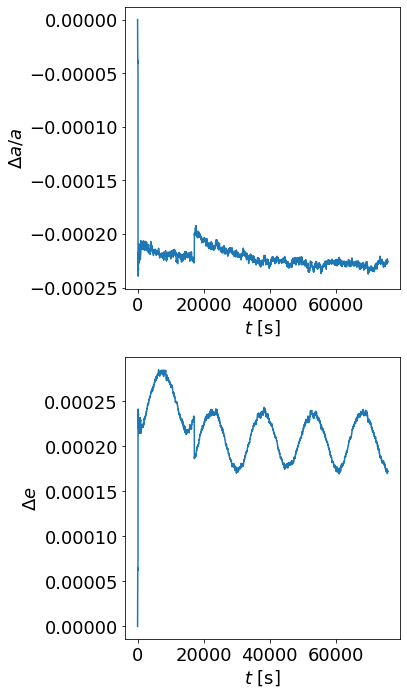

In [43]:
N_step_per_orb = 1000
N_orb = 5

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb

sim = simulator.simulator(p_binary, r_soft_sq1 = eps1**2, r_soft_sq2 = eps2**2, check_state=check_state)
sim.run_simulation(dt, t_end, show_progress=True)
sim.plot_orbital_elements();

In principle, you could also use this to edit the properties of particles in the system during the simulation. 

#### Reconstructing the density profile

We can reconstruct the DM density profile from a particle set `p`

In [44]:
def get_density_profile(p_in, bins = None):
    p = copy.deepcopy(p_in)
    rDM = tools.norm(p.xDM - p.xBH1)
    vDM = tools.norm(p.vDM - p.vBH1)
    
    r_isco = 6*u.G_N*p.M_1/u.c**2
    
    if bins is None:
        bins = np.geomspace(1, 1e5, 51)*r_isco
    
    #Bin edges and widths
    rc = np.sqrt(bins[:-1]*bins[1:])
    dr = np.diff(bins)
    
    #Reconstruct dn/dr
    nDM, _ = np.histogram(rDM, bins=bins)
    
    #Reconstruct rho = m_DM*dn/dV
    M_pseudo = p.M_DM[0]
    shell_volumes = (4*np.pi/3)*(bins[1:]**3 - bins[:-1]**3)
    
    rhoDM = M_pseudo*nDM/shell_volumes
    return rc, rhoDM

We're reconstruct the initial and final density profiles from the simulation.

> Simulating...
No old snapshot file found...
10000 10000 10000


100%|██████████| 10000/10000 [00:46<00:00, 215.65it/s]


> Simulation completed.


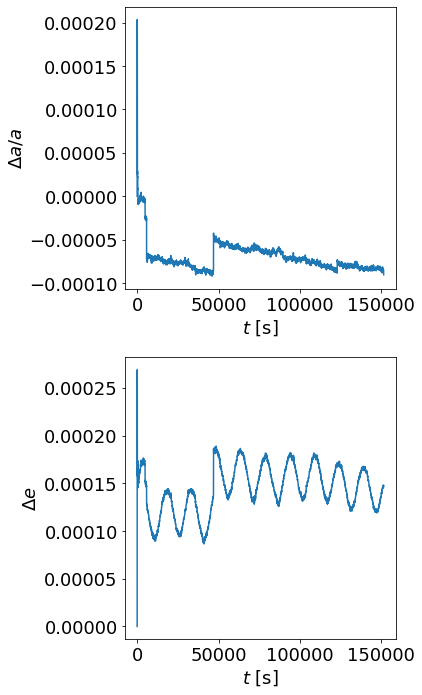

In [101]:
T_orb = p_binary.T_orb()
N_step_per_orb = 1000
N_orb = 10

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb


sim = simulator.simulator(p_binary, r_soft_sq1 = eps1**2, r_soft_sq2 = eps2**2)

sim.run_simulation(dt, t_end, show_progress=True, save_to_file = True, save_DM_states = True)
sim.plot_orbital_elements();

In [102]:
rc, rho_i = get_density_profile(p_binary)
rc, rho_f = get_density_profile(sim.p)

Then we'll plot the density profiles (and their ratio):

In [110]:
r_isco/u.pc *10**5

2.1504549999999997e-07

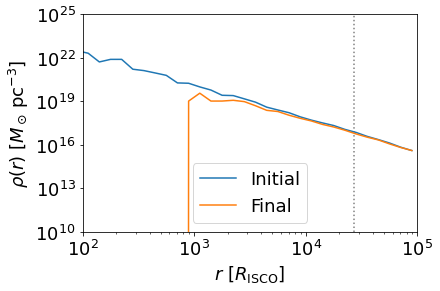

In [103]:
plt.figure()

plt.axvline(a_i/r_isco, linestyle=':', color='gray')
#plt.axhline(1, linestyle='--', color='k')

plt.loglog(rc/r_isco, rho_i/(u.Msun/u.pc**3), label='Initial')
plt.semilogx(rc/r_isco, rho_f/(u.Msun/u.pc**3), label='Final')
plt.xlim(1e2, 1e5)
plt.ylim(1e10, 1e25)

plt.legend()

plt.xlabel(r"$r$ [$R_\mathrm{ISCO}$]")
plt.ylabel(r"$\rho(r)$ [$M_\odot \,\mathrm{pc}^{-3}$]")

plt.show()

<ipython-input-54-8c65ae2c7413>:9: RuntimeWarning: invalid value encountered in divide
  plt.semilogx(rc/r_isco, rho_f/rho_i)


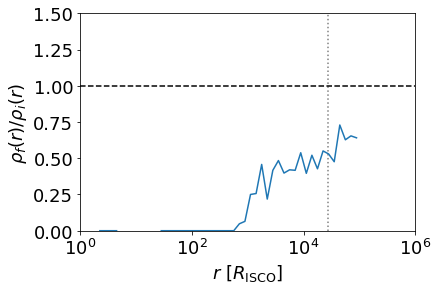

In [54]:
plt.figure()

#plt.axvline(10*r_isco/r_isco, linestyle=':', color='gray')

plt.axvline(a_i/r_isco, linestyle=':', color='gray')

plt.axhline(1, linestyle='--', color='k')

plt.semilogx(rc/r_isco, rho_f/rho_i)
plt.xlim(1, 1e6)
plt.ylim(0, 1.5)

plt.xlabel(r"$r$ [$R_\mathrm{ISCO}$]")
plt.ylabel(r"$\rho_f(r)/\rho_i(r)$")

plt.show()

I can see nothing with 100 orbits. I need to run more... I'll save it every 500 orbits, let's hope this works

In [56]:
T_orb = p_binary.T_orb()
N_step_per_orb = 1000
N_orb = 9000

t_end = T_orb*N_orb
dt    = T_orb/N_step_per_orb

sim = simulator.simulator(p_binary, r_soft_sq1 = (eps1)**2, r_soft_sq2 = (eps2)**2)
sim.run_simulation(dt, t_end, show_progress=True, N_save = 1000, save_to_file = True, save_DM_states = True)


> Simulating...
No old snapshot file found...
2500000 5 1


100%|██████████| 2500000/2500000 [3:59:03<00:00, 174.30it/s]      


> Simulation completed.


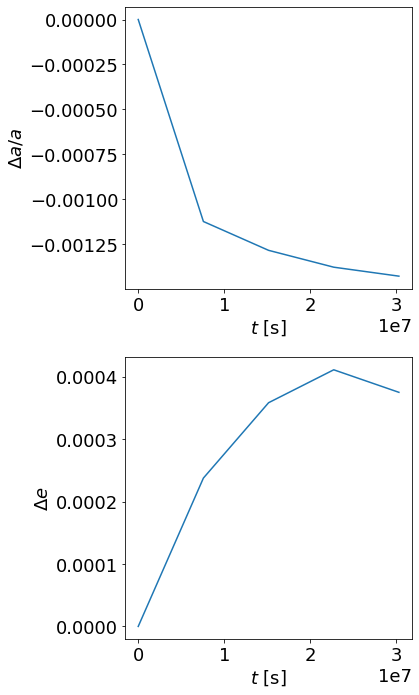

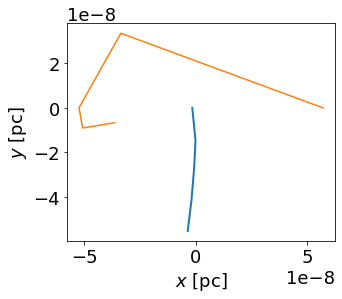

In [57]:
sim.plot_orbital_elements();
sim.plot_trajectory();

In [58]:
print(sim.IDhash)

9FEb1


In [59]:
rc, rho_i = get_density_profile(p_binary)
rc, rho_f = get_density_profile(sim.p)

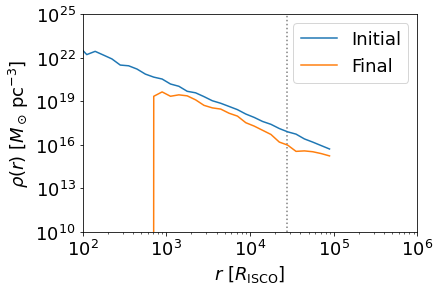

In [64]:
plt.figure()

plt.axvline(a_i/r_isco, linestyle=':', color='gray')
#plt.axhline(1, linestyle='--', color='k')

plt.loglog(rc/r_isco, rho_i/(u.Msun/u.pc**3), label='Initial')
plt.semilogx(rc/r_isco, rho_f/(u.Msun/u.pc**3), label='Final')
plt.xlim(1e2, 1e6)
plt.ylim(1e10, 1e25)

plt.legend()

plt.xlabel(r"$r$ [$R_\mathrm{ISCO}$]")
plt.ylabel(r"$\rho(r)$ [$M_\odot \,\mathrm{pc}^{-3}$]")

plt.show()

I'm going to define a check_state function that does two things:
- prints close encounters if they happen
- saves the density profile somewhere

In [ ]:
def check_state(simulator):
    #The particle set is stored in an object labelled `p` in the simulator. 
    #Let's check the minimum separation between the DM and the small BH
    
    r_DM = tools.norm(simulator.p.xDM - simulator.p.xBH2)
    #if np.any(r_DM < r_2):
        #print("Star crossing! r_min = ", np.min(r_DM/u.pc), "pc")
    if np.any(r_DM < 10**-9 *u.pc):
        print("Close encounter! r_min = ", np.min(r_DM/u.pc), "pc")
        
        
        

In [71]:
p_binary.xBH2


array([1.76424618e+09, 0.00000000e+00, 0.00000000e+00])

In [86]:
#import h5py

#f_prova = h5py.File("prova", "w")
#grp_prova = f_prova.create_group("datiprova")
        
N_prova=3        

N_obj=10
    
datatype = np.float64

#prova_data = grp_prova.create_dataset("prova1", (N_prova,3), dtype=datatype, compression="gzip")

prova1=np.array([1,2,3])

prova_list=np.zeros((N_prova, 3))
prova_list[1,:] = prova1

#prova_data_new = grp_prova.create_dataset("prova2", (N_prova, N_obj, 3), dtype=datatype, compression="gzip")

prova2=2*np.ones((N_obj, 3))
prova3=3*np.ones((N_obj, 3))

prova_list2=np.zeros((N_prova, N_obj, 3))

prova_list2[1,:, :] = prova2
prova_list2[2,:, :] = prova3


In [87]:
prova_list2

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]],

       [[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]])

In [89]:
prova_list2[0,::]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [91]:
arr = np.array([1, 2, 3, 4, 5, 6, 7])

print(arr[::2]) 
print(arr[::3]) 

[1 3 5 7]
[1 4 7]


In [ ]:
f = h5py.File("prova", "w")
grp = f.create_group("data")
        
Nstep=3        
    
datatype = np.float64

        
xBH1_data = grp.create_dataset("xBH1", (N_step,3), dtype=datatype, compression="gzip")

xBH1_list = np.zeros((N_step, 3))

for iteration in stepper(range(N_step)):
              
xBH1_list[iteration,:] = p.xBH1 ## 

#N_update = 100_000 #Update the output file only every 100_000 steps

if ((it%N_update == 0) and (save_to_file)):
    
    xBH1_data[:,:] = 1.0*xBH1_list[::N_save,:]

######## do the same for DM particles ###########

#create group
DM_data = grp.create_dataset("xDM", (N_step, self.p.N_DM,3), dtype=datatype, compression="gzip")

#initialize list
xDM_list = np.zeros((N_step, self.p.N_DM, 3))

#add current state to list 

DM_list[iteration,:,:] = p.xDM

#if the iteration is a multiple of N_update, update the file

if ((it%N_update == 0) and (save_to_file)):

    DM_data[:,:,:] = 1.0*DM_list[::N_save,:,:]   #this slices the array selecting only multiples of Nsave
    
#######

#### Studying the particles

You can directly examine the properties of the particles in the simulation:

In [15]:
#The three dimensional coordinates of the particles in units of parsec:
print(sim.p.xDM/u.pc)

[[-2.91658911e-09  2.24131689e-09 -1.11381561e-08]
 [ 1.08257138e-08  6.00401586e-09 -5.74733639e-10]
 [-4.13960234e-08  8.23110814e-08 -5.92390481e-08]
 ...
 [-6.37128168e-10  6.03769497e-12  2.62108887e-09]
 [-1.19169969e-08 -1.91217809e-08  7.25160039e-09]
 [ 1.07047202e-09 -8.14245365e-09 -1.24408332e-09]]


Alternatively, you can save the simulations results to a file and then read them back in:

In [16]:
sim = simulator.simulator(p_binary, r_soft_sq1 = eps1**2, r_soft_sq2 = eps2**2)
sim.run_simulation(dt, t_end, show_progress=True, save_to_file = True, save_DM_states = True)

> Simulating...
No old snapshot file found...
1000 1000 1000


100%|██████████| 1000/1000 [00:05<00:00, 192.28it/s]


> Simulation completed.


The result is saved as an hdf file, labelled by an ID hash, in the snapshots folder:

In [17]:
print(sim.IDhash)

b78f0


We can also load the particles from the saved file:

In [18]:
p1 = particles.load_particles_from_file(sim.IDhash, which="initial") #The initial particle list
p2 = particles.load_particles_from_file(sim.IDhash, which="final") #The final particle list (at the end of the simulation)

In [19]:
print(p1.xDM/u.pc)
print(p2.xDM/u.pc)

[[ 3.94088231e-09  1.32687169e-09 -9.47017782e-09]
 [ 5.63662973e-09 -1.79984790e-09 -5.41247002e-09]
 [-3.84294987e-08  8.41423578e-08 -6.00848922e-08]
 ...
 [-6.26099748e-10 -4.04889011e-12  2.59810585e-09]
 [-1.61309880e-08 -1.70765993e-08  2.24298905e-09]
 [ 5.08434490e-09 -1.21253677e-08  2.31491554e-09]]
[[-2.91658911e-09  2.24131689e-09 -1.11381561e-08]
 [ 1.08257138e-08  6.00401586e-09 -5.74733639e-10]
 [-4.13960234e-08  8.23110814e-08 -5.92390481e-08]
 ...
 [-6.37128168e-10  6.03769497e-12  2.62108887e-09]
 [-1.19169969e-08 -1.91217809e-08  7.25160039e-09]
 [ 1.07047202e-09 -8.14245365e-09 -1.24408332e-09]]
